# Imports 

In [1]:
plot_dir='../plots'

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os, sys
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from bench_utils import *
from plot_utils import *

# For bigfiles
from io import TextIOWrapper
from zipfile import ZipFile

import numpy as np

def stdef(vals):  
    avg = sum(vals) / len(vals);  
    sumderiv = 0;  
    for val in vals:
        sumderiv = sumderiv + val * val
    sumderivavg = sumderiv / (len(vals) - 1)
    return math.sqrt(sumderivavg - (avg*avg))

# Plot rules

In [3]:
# Color rules (based on https://personal.sron.nl/~pault/)
append_col = "#117733"
write_col  = "#44AA99"
write_none_col       = "#88CCEE"
write_mq_deadline_col = "#999933"
reset_col = "#DDCC77"
read_col   = "#CC6677"
read_none_col = "#88CCEE"
read_mq_deadline_col = "#AA4499"
undefined_col = "#DDDDDD"
state_machine_col = "#CC3311"

lbaf0_pattern = r'\\\\'
lbaf2_pattern = '..'

text_font_size = 10
marker_font_size = 11
label_font_size = 12
axes_font_size = 12

plt.rc('font', size=text_font_size)         
plt.rc('axes', labelsize=axes_font_size)    
plt.rc('xtick', labelsize=label_font_size)    
plt.rc('ytick', labelsize=label_font_size)    
plt.rc('legend', fontsize=label_font_size)  

# Appends versus writes

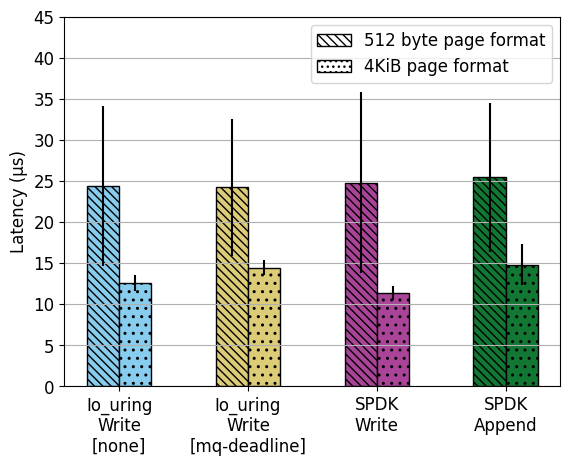

In [203]:
fig, ax = plt.subplots()

kiops_512 = []
kiopse_512 = []
bs_512 = 512
for path in [
           BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "write", 1, 1, bs_512
            ),
            BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "writemq", 1, 1, bs_512
            ),
            BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "write", 1, 1, bs_512
            ),
            BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "append", 1, 1, bs_512
            )
]:
    dat = parse_fio_file(path, FioOperation.WRITE)
    kiops_512.append(dat.lat_mean / 1000)
    kiopse_512.append(dat.lat_stddev / 1000)
k512 = ax.bar([x-0.125 for x in range(4)], kiops_512, yerr=kiopse_512, align='center', 
              color=[write_none_col, reset_col, read_mq_deadline_col, append_col], 
              width=0.25, label="512 byte pagesize format", 
              hatch=lbaf0_pattern, edgecolor = "black", ecolor="black")

kiops_4k = []
kiopse_4k = []
bs_4096 = 4096
for path in [
           BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "write", 1, 1, bs_4096
            ),
            BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, 1, bs_4096
            ),
            BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "write", 1, 1, bs_4096
            ),
            BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, 1, bs_4096
            )
]:
    dat = parse_fio_file(path, FioOperation.WRITE)
    kiops_4k.append(dat.lat_mean / 1000)
    kiopse_4k.append(dat.lat_stddev / 1000)
k4 = ax.bar([x+0.125 for x in range(4)], kiops_4k, yerr=kiopse_4k, align='center', 
            color=[write_none_col, reset_col, read_mq_deadline_col, append_col], 
            width=0.25, label="4KiB pagesize format", 
            hatch=lbaf2_pattern, edgecolor = "black", ecolor="black")


plt.ylabel("Latency (μs)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 45)

plot_512_patch = mpatches.Patch(facecolor='white', label='512 byte page format'
                                ,hatch=lbaf0_pattern, edgecolor = "black")
plot_4KiB_patch = mpatches.Patch(facecolor='white', label='4KiB page format',
                                 hatch='...', edgecolor = "black")

plt.legend(handles = [plot_512_patch, plot_4KiB_patch])

ax.set_xticks(range(4), labels=[
    "Io_uring\nWrite\n[none]", 
    "Io_uring\nWrite\n[mq-deadline]", 
    "SPDK\nWrite", "SPDK\nAppend"]
)
fig.savefig(f"{plot_dir}/f1-lbaf_512_versus_lbaf_4KiB(QD=1).pdf", bbox_inches="tight")

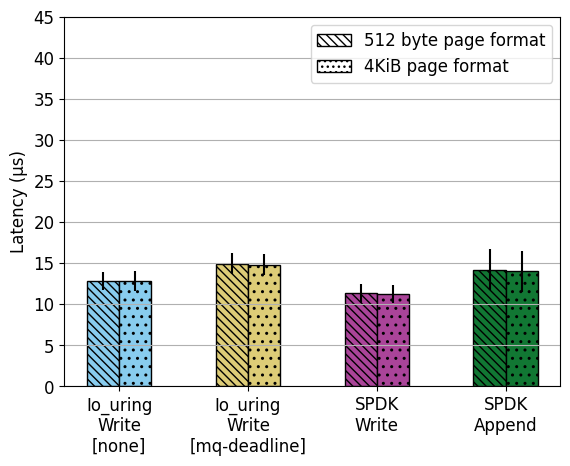

In [189]:
fig, ax = plt.subplots()

kiops_512 = []
kiopse_512 = []
bs_512=8192
for path in [
           BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "write", 1, 1, bs_512
            ),
            BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "writemq", 1, 1, bs_512
            ),
            BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "write", 1, 1, bs_512
            ),
            BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "append", 1, 1, bs_512
            )
]:
    dat = parse_fio_file(path, FioOperation.WRITE)
    kiops_512.append(dat.lat_mean / 1000)
    kiopse_512.append(dat.lat_stddev / 1000)
k512 = ax.bar([x-0.125 for x in range(4)], kiops_512, yerr=kiopse_512, align='center', 
              color=[write_none_col, reset_col, read_mq_deadline_col, append_col], 
              width=0.25, label="512 byte pagesize format", 
              hatch=lbaf0_pattern, edgecolor = "black", ecolor="black")

kiops_4k = []
kiopse_4k = []
bs_4k=8192
for path in [
           BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "write", 1, 1, bs_4k
            ),
            BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, 1, bs_4k
            ),
            BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "write", 1, 1, bs_4k
            ),
            BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, 1, bs_4k
            )
]:
    dat = parse_fio_file(path, FioOperation.WRITE)
    kiops_4k.append(dat.lat_mean / 1000)
    kiopse_4k.append(dat.lat_stddev / 1000)
k4 = ax.bar([x+0.125 for x in range(4)], kiops_4k, yerr=kiopse_4k, align='center', 
            color=[write_none_col, reset_col, read_mq_deadline_col, append_col], 
            width=0.25, label="4KiB pagesize format", 
            hatch=lbaf2_pattern, edgecolor = "black", ecolor="black")


plt.ylabel("Latency (μs)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 45)

plot_512_patch = mpatches.Patch(facecolor='white', label='512 byte page format', 
                                hatch=lbaf0_pattern, edgecolor = "black")
plot_4KiB_patch = mpatches.Patch(facecolor='white', label='4KiB page format', 
                                 hatch='...', edgecolor = "black")

plt.legend(handles = [plot_512_patch, plot_4KiB_patch])

ax.set_xticks(range(4), labels=["Io_uring\nWrite\n[none]", 
                                "Io_uring\nWrite\n[mq-deadline]", 
                                "SPDK\nWrite", 
                                "SPDK\nAppend"]
)
fig.savefig(f"{plot_dir}/f2-lbaf_512_versus_lbaf_4KiB_8KiB_requests(QD=1).pdf", bbox_inches="tight")

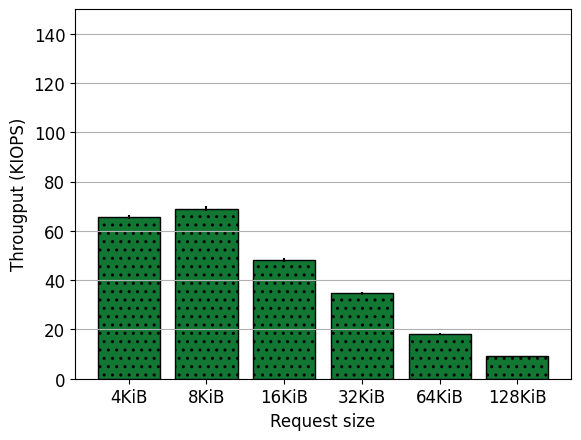

In [11]:
qd = 1
bss = [4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, bs
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.ylabel("Througput (KIOPS)")
plt.xlabel("Request size")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 150)

ax.bar(range(len(bss)), kiops, yerr=kiopse, align='center', color=append_col, 
       hatch=lbaf2_pattern, edgecolor = "black", ecolor="black")
ax.set_xticks(range(len(bss)), labels=["4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])
fig.savefig(f"{plot_dir}/f3-lbaf4KiB_optimal_append_size.pdf")

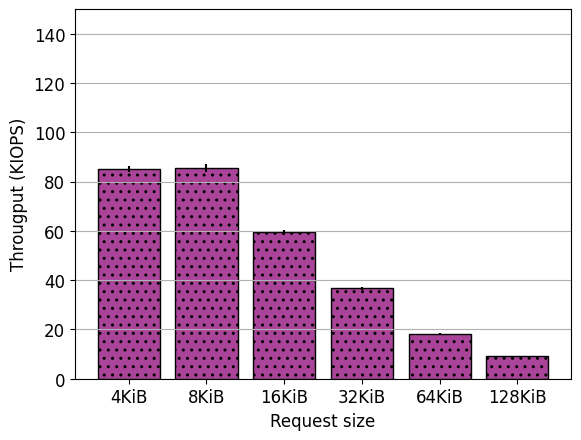

In [182]:
qd = 1
bss = [4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "write", 1, qd, bs
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.ylabel("Througput (KIOPS)")
plt.xlabel("Request size")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 150)

ax.bar(range(len(bss)), kiops, yerr=kiopse, align='center', color=read_mq_deadline_col, 
       hatch=lbaf2_pattern, edgecolor = "black", ecolor="black")
ax.set_xticks(range(len(bss)), labels=["4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])
fig.savefig(f"{plot_dir}/f4-lbaf4KiB_optimal_spdk_write_size.pdf")

# Intra-zone

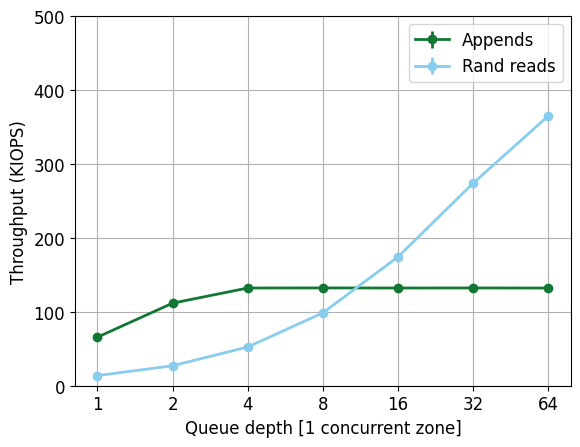

In [251]:
fig, ax = plt.subplots()
plt.xlabel("Queue depth [1 concurrent zone]")
plt.ylabel("Throughput (KIOPS)")
ax.grid(True)

qdss = [1,2,4,8,16, 32, 64]
rang = range(len(qdss))    
    
kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, 4096
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Appends",
    color=append_col,
    fmt='-o',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, qd, 4096
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

# plt.errorbar(
#     rang,
#     kiops,
#     yerr=kiopse,
#     linewidth=2,
#     label="Writes [mq-deadline]",
#     color=write_mq_deadline_col,
#     fmt='-o',
# )

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "randread", 1, qd, 4096
            ), FioOperation.READ
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)
    
plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Rand reads",
    color=read_none_col,
    fmt='-o',
)
                
plt.ylim(0, 500)
ax.set_xticks(rang, labels=[str(qd) for qd in qdss])

plt.legend()
fig.savefig(f"{plot_dir}/f7-lbaf4KiB_1zone_scalability_no_mq.pdf")

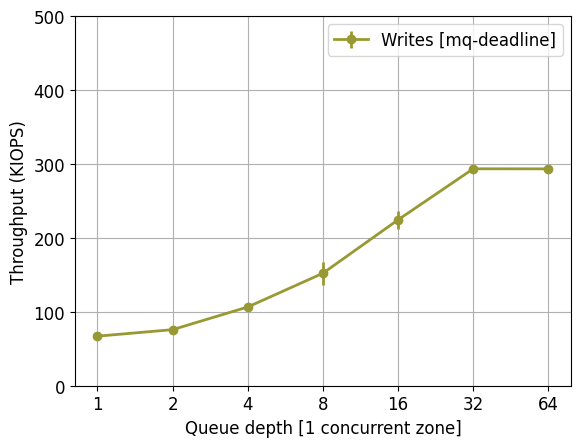

In [252]:
fig, ax = plt.subplots()
plt.xlabel("Queue depth [1 concurrent zone]")
plt.ylabel("Throughput (KIOPS)")
ax.grid(True)

qdss = [1,2,4,8,16, 32, 64]
rang = range(len(qdss))    
    
# kiops = []
# kiopse = []
# for qd in qdss:
#     dat = parse_fio_file(
#         BenchPath(
#             string_to_io_engine("spdk"), "zns-a", 
#             "lbaf2", "append", 1, qd, 4096
#             ), FioOperation.WRITE
#         )
#     kiops.append(dat.iops_mean / 1000)
#     kiopse.append(dat.iops_stddev / 1000)

# plt.errorbar(
#     rang,
#     kiops,
#     yerr=kiopse,
#     linewidth=2,
#     label="Appends",
#     color=append_col,
#     fmt='-o',
# )

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, qd, 4096
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Writes [mq-deadline]",
    color=write_mq_deadline_col,
    fmt='-o',
)

# kiops = []
# kiopse = []
# for qd in qdss:
#     dat = parse_fio_file(
#         BenchPath(
#             string_to_io_engine("spdk"), "zns-a", 
#             "lbaf2", "randread", 1, qd, 4096
#             ), FioOperation.READ
#         )
#     kiops.append(dat.iops_mean / 1000)
#     kiopse.append(dat.iops_stddev / 1000)
    
# plt.errorbar(
#     rang,
#     kiops,
#     yerr=kiopse,
#     linewidth=2,
#     label="Rand reads",
#     color=read_none_col,
#     fmt='-o',
# )
                
plt.ylim(0, 500)
ax.set_xticks(rang, labels=[str(qd) for qd in qdss])

plt.legend()
fig.savefig(f"{plot_dir}/f7-lbaf4KiB_1zone_scalability_mq.pdf")

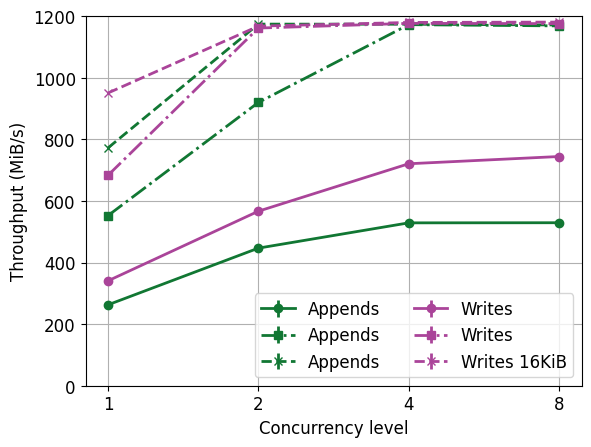

In [248]:
fig, ax = plt.subplots()
plt.xlabel("Concurrency level")
plt.ylabel("Throughput (MiB/s)")
ax.grid(True)

qdss = [1,2,4,8]
rang = range(len(qdss))    
    
kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, 4096
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

plt.errorbar(
    rang,
    [(k * 4096) / 1024 for k in kiops],
    yerr=kiopse,
    linewidth=2,
    label="Appends",
    color=append_col,
    fmt='-o',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, 8192
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

plt.errorbar(
    rang,
    [(k * 8192) / 1024 for k in kiops],
    yerr=kiopse,
    linewidth=2,
    label="Appends",
    color=append_col,
    fmt='-.s',
)


kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, 16384
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

plt.errorbar(
    rang,
    [(k * 16384) / 1024 for k in kiops],
    yerr=kiopse,
    linewidth=2,
    label="Appends",
    color=append_col,
    fmt='--x',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "write", qd, 1, 4096
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

plt.errorbar(
    rang,
    [(k * 4096) / 1024 for k in kiops],
    yerr=kiopse,
    linewidth=2,
    label="Writes",
    color=read_mq_deadline_col,
    fmt='-o',
)


kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "write", qd, 1, 8192
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

plt.errorbar(
    rang,
    [(k * 8192) / 1024 for k in kiops],
    yerr=kiopse,
    linewidth=2,
    label="Writes",
    color=read_mq_deadline_col,
    fmt='-.s',
)



kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "write", qd, 1, 16384
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

plt.errorbar(
    rang,
    [(k * 16384) / 1024 for k in kiops],
    yerr=kiopse,
    linewidth=2,
    label="Writes 16KiB",
    color=read_mq_deadline_col,
    fmt='--x',
)
                
plt.ylim(0, 1200)
ax.set_xticks(rang, labels=[str(qd) for qd in qdss])

plt.legend(loc="lower right", ncol=2)
fig.savefig(f"{plot_dir}/f7-lbaf4KiB_scalability.pdf")

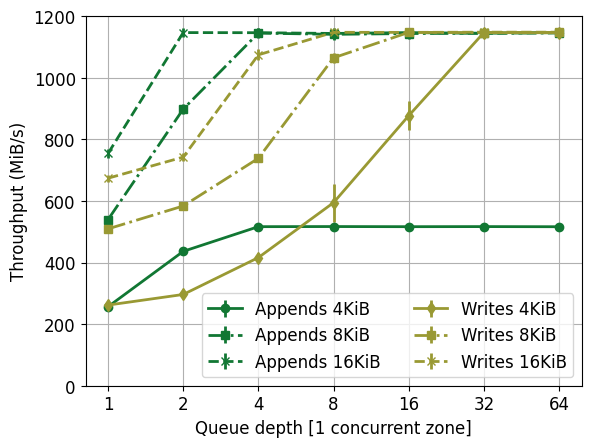

In [222]:
fig, ax = plt.subplots()
plt.xlabel("Queue depth [1 concurrent zone]")
plt.ylabel("Throughput (MiB/s)")
ax.grid(True)

qdss = [1,2,4,8,16, 32, 64]
rang = range(len(qdss))    
    
kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, 4096
            ), FioOperation.WRITE
        )
    kiops.append((dat.iops_mean * 4096) / (1024 * 1024))
    kiopse.append((dat.iops_stddev * 4096) / (1024 * 1024))

plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Appends 4KiB",
    color=append_col,
    fmt='-o',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, 8192
            ), FioOperation.WRITE
        )
    kiops.append((dat.iops_mean * 8192) / (1024 * 1024))
    kiopse.append((dat.iops_stddev * 8192) / (1024 * 1024))

plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Appends 8KiB",
    color=append_col,
    fmt='-.s',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, 16384
            ), FioOperation.WRITE
        )
    kiops.append((dat.iops_mean * 16384) / (1024 * 1024))
    kiopse.append((dat.iops_stddev * 16384) / (1024 * 1024))

plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Appends 16KiB",
    color=append_col,
    fmt='--x',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, qd, 4096
            ), FioOperation.WRITE
        )
    kiops.append((dat.iops_mean * 4096) / (1024 * 1024))
    kiopse.append((dat.iops_stddev * 4096) / (1024 * 1024))

plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Writes 4KiB",
    color=write_mq_deadline_col,
    fmt='-d',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, qd, 8192
            ), FioOperation.WRITE
        )
    kiops.append((dat.iops_mean * 8192) / (1024 * 1024))
    kiopse.append((dat.iops_stddev * 8192) / (1024 * 1024))

plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Writes 8KiB",
    color=write_mq_deadline_col,
    fmt='-.s',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, qd, 16384
            ), FioOperation.WRITE
        )
    kiops.append((dat.iops_mean * 16384) / (1024 * 1024))
    kiopse.append((dat.iops_stddev * 16384) / (1024 * 1024))

plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Writes 16KiB",
    color=write_mq_deadline_col,
    fmt='--x',
)

                
plt.ylim(0, 1200)
ax.set_xticks(rang, labels=[str(qd) for qd in qdss])

plt.legend(ncol=2)


fig.savefig(f"{plot_dir}/f7b-lbaf4KiB_1zone_scalability.pdf")

# Inter-zone

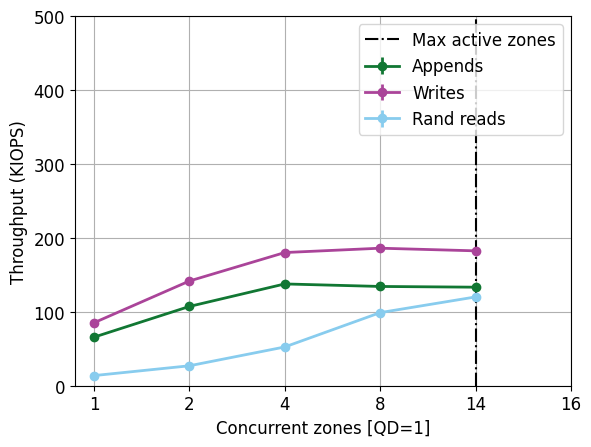

In [202]:
fig, ax = plt.subplots()
plt.xlabel("Concurrent zones [QD=1]")
plt.ylabel("Throughput (KIOPS)")
ax.grid(True)

qdss = [1,2,4,8,14]
rang = range(len(qdss))    
    
kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", qd, 1, 4096
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)   
plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Appends",
    color=append_col,
    fmt='-o',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "write", qd, 1, 4096
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)
plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Writes",
    color=read_mq_deadline_col,
    fmt='-o',
)


kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "randread", qd, 1, 4096
            ), FioOperation.READ
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)
plt.errorbar(
    rang,
    kiops,
    yerr=kiopse,
    linewidth=2,
    label="Rand reads",
    color=read_none_col,
    fmt='-o',
)
                
plt.ylim(0, 500)
ax.set_xticks(range(len(qdss)+1), labels=[str(qd) for qd in qdss + [16]])
ax.set_xlim(-0.2,5)
plt.vlines(4,0, 500, colors="black", linestyles="dashdot", label="Max active zones")

plt.legend(loc='upper right')
fig.savefig(f"{plot_dir}/f6-lbaf4KiB_concurrent_zone_scalability.pdf")


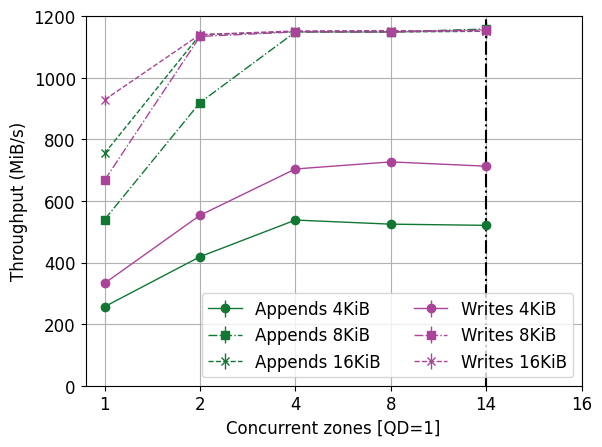

In [205]:
fig, ax = plt.subplots()
plt.xlabel("Concurrent zones [QD=1]")
plt.ylabel("Throughput (MiB/s)")
ax.grid(True)

qdss = [1,2,4,8,14]
rang = range(len(qdss))    
    
kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", qd, 1, 4096
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean * 4096)
    kiopse.append(dat.iops_stddev * 4096)   
plt.errorbar(
    rang,
    [kiop / (1024 * 1024) for kiop in kiops],
    yerr=[kiop / (1024 * 1024) for kiop in kiopse],
    linewidth=1,
    label="Appends 4KiB",
    color=append_col,
    fmt='-o',
)

    
kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", qd, 1, 8192
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean * 8192)
    kiopse.append(dat.iops_stddev * 8192)   
plt.errorbar(
    rang,
    [kiop / (1024 * 1024) for kiop in kiops],
    yerr=[kiop / (1024 * 1024) for kiop in kiopse],
    linewidth=1,
    label="Appends 8KiB",
    color=append_col,
    fmt='-.s',
)

    
kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", qd, 1, 8192 << 1
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean * (8192 << 1))
    kiopse.append(dat.iops_stddev * (8192 << 1))  
plt.errorbar(
    rang,
    [kiop / (1024 * 1024) for kiop in kiops],
    yerr=[kiop / (1024 * 1024) for kiop in kiopse],
    linewidth=1,
    label="Appends 16KiB",
    color=append_col,
    fmt='--x',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "write", qd, 1, 4096
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean * 4096)
    kiopse.append(dat.iops_stddev * 4096)
plt.errorbar(
    rang,
    [kiop / (1024 * 1024) for kiop in kiops],
    yerr=[kiop / (1024 * 1024) for kiop in kiopse],
    linewidth=1,
    label="Writes 4KiB",
    color=read_mq_deadline_col,
    fmt='-o',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "write", qd, 1, 8192
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean * 8192)
    kiopse.append(dat.iops_stddev * 8192)
plt.errorbar(
    rang,
    [kiop / (1024 * 1024) for kiop in kiops],
    yerr=[kiop / (1024 * 1024) for kiop in kiopse],
    linewidth=1,
    label="Writes 8KiB",
    color=read_mq_deadline_col,
    fmt='-.s',
)

kiops = []
kiopse = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "write", qd, 1, 8192 << 1
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean * (8192 << 1))
    kiopse.append(dat.iops_stddev * (8192 << 1))
plt.errorbar(
    rang,
    [kiop / (1024 * 1024) for kiop in kiops],
    yerr=[kiop / (1024 * 1024) for kiop in kiopse],
    linewidth=1,
    label="Writes 16KiB",
    color=read_mq_deadline_col,
    fmt='--x',
)
                
plt.ylim(0, 1200)
ax.set_xticks(range(len(qdss)+1), labels=[str(qd) for qd in qdss + [16]])
ax.set_xlim(-0.2,5)
plt.vlines(4,0, 1500, colors="black", linestyles="dashdot")

plt.legend(loc='lower right', ncol=2)
fig.savefig(f"{plot_dir}/f6b-lbaf4KiB_concurrent_zone_scalability.pdf")


 # Scalability (dropped from paper)

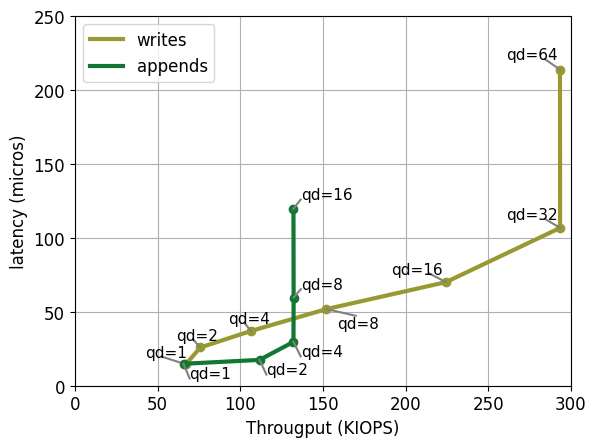

In [18]:
# Setup plot
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
ax.grid(True)

# Get data for writemq
qdss = [1,2,4,8,16,32,64]
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, qd, 4096
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
# Writemq line plot
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="writes",
    color=write_mq_deadline_col,
)

# Writemq QD labels
for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color=write_mq_deadline_col)
            if qdss[i] == 1:
                plt.text((kiops[i] - 25) * (1.01), (lats[i] + 5) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=marker_font_size)
                plt.plot([(kiops[i] - 15) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            elif qdss[i] > 8:
                plt.text((kiops[i] - 35) * (1.01), (lats[i] + 5) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=marker_font_size)                
                plt.plot([(kiops[i] - 12) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            elif qdss[i] == 8:
                plt.text((kiops[i] + 5) * (1.01), (lats[i] - 13) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=marker_font_size)                
                plt.plot([(kiops[i] + 16) * (1.01), kiops[i]],[(lats[i]-5) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] - 15) * (1.01), (lats[i] + 5) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=marker_font_size)
                plt.plot([(kiops[i] - 5) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
   

 # Get data for Append
qdss = [1,2,4,8,16]
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, 4096
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

# Append line plot
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="appends",
    color=append_col,
)

# Append QD labels
for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color=append_col)
            if qdss[i] >= 8:
                plt.text((kiops[i] + 3) * (1.01), (lats[i]+5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=marker_font_size)                
                plt.plot([(kiops[i] + 3) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] + 3) * (1.01), (lats[i]-10) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=marker_font_size)
                plt.plot([(kiops[i] + 3) * (1.01), kiops[i]],[(lats[i]-10) *
                     (1.01),lats[i]], color='grey')

# Plot it
plt.xlim(0, 300)
plt.ylim(0, 250)
plt.legend()
fig.savefig(f"{plot_dir}/f7-writes_versus_appends(bs=4KiB).pdf")

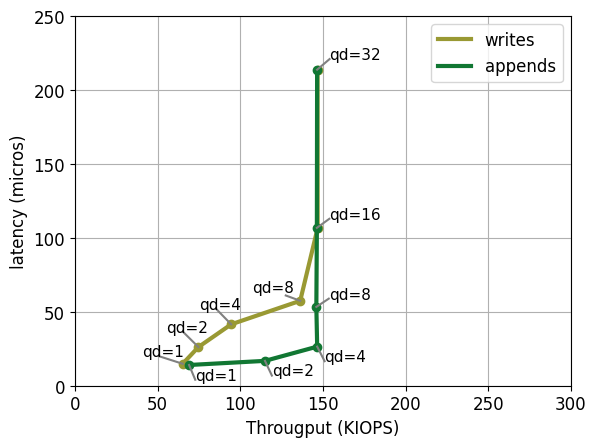

In [19]:
# Setup plot
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
ax.grid(True)

# Get data for writemq
qdss = [1,2,4,8,16,32]
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, qd, 8192
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
# Writemq line plot
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="writes",
    color=write_mq_deadline_col,
)

# Writemq QD labels
for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color=write_mq_deadline_col)
            if qdss[i] == 1:
                plt.text((kiops[i] - 25) * (1.01), (lats[i] + 5) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=marker_font_size)
                plt.plot([(kiops[i] - 15) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            elif qdss[i] == 8:
                plt.text((kiops[i] - 30) * (1.01), (lats[i] + 5) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=marker_font_size)                
                plt.plot([(kiops[i] - 10) * (1.01), kiops[i]],[(lats[i]+3) *
                     (1.01),lats[i]], color='grey')
            elif qdss[i] < 8:
                plt.text((kiops[i] - 20) * (1.01), (lats[i] + 10) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=marker_font_size)
                plt.plot([(kiops[i] - 10) * (1.01), kiops[i]],[(lats[i]+10) *
                     (1.01),lats[i]], color='grey')
   

 # Get data for Append
qdss = [1,2,4,8,16,32]
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, 8192
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

# Append line plot
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="appends",
    color=append_col,
)

# Append QD labels
for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color=append_col)
            if qdss[i] >= 8:
                plt.text((kiops[i] + 6) * (1.01), (lats[i]+5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=marker_font_size)                
                plt.plot([(kiops[i] + 6) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] + 3) * (1.01), (lats[i]-10) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=marker_font_size)
                plt.plot([(kiops[i] + 3) * (1.01), kiops[i]],[(lats[i]-10) *
                     (1.01),lats[i]], color='grey')

# Plot it
plt.xlim(0, 300)
plt.ylim(0, 250)
plt.legend()
fig.savefig(f"{plot_dir}/f7-writes_versus_appends(bs=8KiB).pdf")

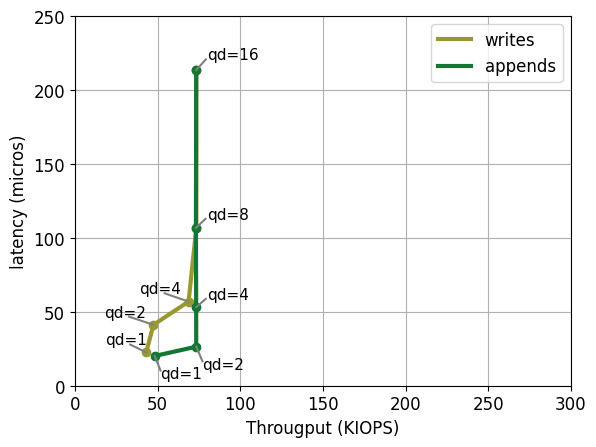

In [20]:
# Setup plot
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
ax.grid(True)

# Get data for writemq
qdss = [1,2,4,8,16]
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, qd, 8192 << 1
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
# Writemq line plot
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="writes",
    color=write_mq_deadline_col,
)

# Writemq QD labels
for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color=write_mq_deadline_col)
            if qdss[i] == 1:
                plt.text((kiops[i] - 25) * (1.01), (lats[i] + 5) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=marker_font_size)
                plt.plot([(kiops[i] - 10) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            elif qdss[i] < 8:
                plt.text((kiops[i] - 30) * (1.01), (lats[i] + 5) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=marker_font_size)
                plt.plot([(kiops[i] - 15) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
   

 # Get data for Append
qdss = [1,2,4,8,16]
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, 8192 << 1
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

# Append line plot
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="appends",
    color=append_col,
)

# Append QD labels
for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color=append_col)
            if qdss[i] >= 4:
                plt.text((kiops[i] + 6) * (1.01), (lats[i]+5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=marker_font_size)                
                plt.plot([(kiops[i] + 5) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] + 3) * (1.01), (lats[i]-15) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=marker_font_size)
                plt.plot([(kiops[i] + 3) * (1.01), kiops[i]],[(lats[i]-10) *
                     (1.01),lats[i]], color='grey')

# Plot it
plt.xlim(0, 300)
plt.ylim(0, 250)
plt.legend()
fig.savefig(f"{plot_dir}/f7-writes_versus_appends(bs=16KiB).pdf")

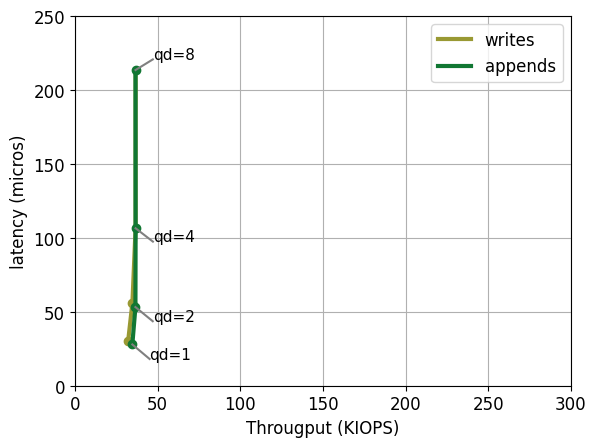

In [21]:
# Setup plot
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
ax.grid(True)

# Get data for writemq
qdss = [1,2,4,8]
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, qd, 8192 << 2
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
# Writemq line plot
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="writes",
    color=write_mq_deadline_col,
)

# Writemq QD labels
for i in range(len(kiops)):
            if i < 2:
                plt.plot(kiops[i], lats[i], "o", color=write_mq_deadline_col)
   

 # Get data for Append
qdss = [1,2,4,8]
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, 8192 << 2
            ), FioOperation.WRITE
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

# Append line plot
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="appends",
    color=append_col,
)

# Append QD labels
for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color=append_col)
            if qdss[i] >= 8:
                plt.text((kiops[i] + 10) * (1.01), (lats[i]+5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=marker_font_size)                
                plt.plot([(kiops[i] + 10) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] + 10) * (1.01), (lats[i]-10) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=marker_font_size)
                plt.plot([(kiops[i] + 10) * (1.01), kiops[i]],[(lats[i]-10) *
                     (1.01),lats[i]], color='grey')

# Plot it
plt.xlim(0, 300)
plt.ylim(0, 250)
plt.legend()
fig.savefig(f"{plot_dir}/f7-writes_versus_appends(bs=32KiB).pdf")

# Resets

In [34]:
reset_100 = []; reset_50 = []; reset_25 = []; reset_12 = []; reset_6 = []; reset_1 = []; reset_0 = []
reset_fin_100 = []; reset_fin_50 = []; reset_fin_25 = []; reset_fin_12 = []; reset_fin_6 = []
reset_fin_1 = []; reset_fin_0 = []
fin_100 = []; fin_50 = []; fin_25 = []; fin_12 = []; fin_6 = []; fin_1 = []; fin_0 = []

reset_fin_files = ["../data/custom/zns-a/partial_reset/run1",
                   "../data/custom/zns-a/partial_reset/run2",
                   "../data/custom/zns-a/partial_reset/run3",
                   "../data/custom/zns-a/partial_reset/run4"
                  ]

for filename in reset_fin_files:
    with open(filename, "r") as f:
        lines = f.readlines()
        reset_100 = reset_100 + [int(line.split(',')[1]) for line in lines if 'reset_275712,' in line]
        reset_50 = reset_50 + [int(line.split(',')[1]) for line in lines if 'reset_137856,' in line]
        reset_25 = reset_25 + [int(line.split(',')[1]) for line in lines if 'reset_68928,' in line]
        reset_12 = reset_12 + [int(line.split(',')[1]) for line in lines if 'reset_34464,' in line]
        reset_6 = reset_6 + [int(line.split(',')[1]) for line in lines if 'reset_17232,' in line]
        reset_1 = reset_1 + [int(line.split(',')[1]) for line in lines if 'reset_1,' in line]  
        reset_0 = reset_0 + [int(line.split(',')[1]) for line in lines if 'reset_0' in line]
        fin_100 = fin_100 + [int(line.split(',')[1]) for line in lines if 'finish_275711,' in line]
        fin_50 = fin_50 + [int(line.split(',')[1]) for line in lines if 'finish_137856,' in line]
        fin_25 = fin_25 + [int(line.split(',')[1]) for line in lines if 'finish_68928,' in line]
        fin_12 = fin_12 + [int(line.split(',')[1]) for line in lines if 'finish_34464,' in line]
        fin_6 = fin_6 + [int(line.split(',')[1]) for line in lines if 'finish_17232,' in line]
        fin_1 = fin_1 + [int(line.split(',')[1]) for line in lines if 'finish_1,' in line]
        fin_0 = fin_0 + [int(line.split(',')[1]) for line in lines if 'finish_0' in line]   
        reset_fin_100 = reset_fin_100 + [int(line.split(',')[1]) for line in lines
                                         if 'reset_finished_275711,' in line]
        reset_fin_50 = reset_fin_50 + [int(line.split(',')[1]) for line in lines 
                                       if 'reset_finished_137856,' in line]
        reset_fin_25 = reset_fin_25 + [int(line.split(',')[1]) for line in lines 
                                       if 'reset_finished_68928,' in line]
        reset_fin_12 = reset_fin_12 + [int(line.split(',')[1]) for line in lines 
                                       if 'reset_finished_34464,' in line]
        reset_fin_6 = reset_fin_6 + [int(line.split(',')[1]) for line in lines
                                     if 'reset_finished_17232,' in line]
        reset_fin_1 = reset_fin_1 + [int(line.split(',')[1]) for line in lines 
                                     if 'reset_finished_1,' in line]
        reset_fin_0 = reset_fin_0 + [int(line.split(',')[1]) for line in lines 
                                     if 'reset_finished_0' in line]    
   
reset_fin_files = [("run1", "../data/custom/zns-a/partial_finish/run1.zip"),
                   ("run2", "../data/custom/zns-a/partial_finish/run2.zip")]

for innername, filename in reset_fin_files:
    with ZipFile(filename) as zf:
        with zf.open(innername, 'r') as f:
            lines = [l.decode("utf-8") for l in f.readlines()]
            reset_100 = reset_100 + [int(line.split(',')[1]) for line in lines if 'reset_275712,' in line]
            reset_50 = reset_50 + [int(line.split(',')[1]) for line in lines if 'reset_137856,' in line]
            reset_25 = reset_25 + [int(line.split(',')[1]) for line in lines if 'reset_68928,' in line]
            reset_12 = reset_12 + [int(line.split(',')[1]) for line in lines if 'reset_34464,' in line]
            reset_6 = reset_6 + [int(line.split(',')[1]) for line in lines if 'reset_17232,' in line]
            reset_1 = reset_1 + [int(line.split(',')[1]) for line in lines if 'reset_1,' in line]  
            reset_0 = reset_0 + [int(line.split(',')[1]) for line in lines if 'reset_0' in line]
            fin_100 = fin_100 + [int(line.split(',')[1]) for line in lines if 'finish_275711,' in line]
            fin_50 = fin_50 + [int(line.split(',')[1]) for line in lines if 'finish_137856,' in line]
            fin_25 = fin_25 + [int(line.split(',')[1]) for line in lines if 'finish_68928,' in line]
            fin_12 = fin_12 + [int(line.split(',')[1]) for line in lines if 'finish_34464,' in line]
            fin_6 = fin_6 + [int(line.split(',')[1]) for line in lines if 'finish_17232,' in line]
            fin_1 = fin_1 + [int(line.split(',')[1]) for line in lines if 'finish_1,' in line]
            fin_0 = fin_0 + [int(line.split(',')[1]) for line in lines if 'finish_0' in line]   
            reset_fin_100 = reset_fin_100 + [int(line.split(',')[1]) for line in lines
                                             if 'reset_finished_275711,' in line]
            reset_fin_50 = reset_fin_50 + [int(line.split(',')[1]) for line in lines 
                                           if 'reset_finished_137856,' in line]
            reset_fin_25 = reset_fin_25 + [int(line.split(',')[1]) for line in lines 
                                           if 'reset_finished_68928,' in line]
            reset_fin_12 = reset_fin_12 + [int(line.split(',')[1]) for line in lines 
                                           if 'reset_finished_34464,' in line]
            reset_fin_6 = reset_fin_6 + [int(line.split(',')[1]) for line in lines
                                         if 'reset_finished_17232,' in line]
            reset_fin_1 = reset_fin_1 + [int(line.split(',')[1]) for line in lines 
                                         if 'reset_finished_1,' in line]
            reset_fin_0 = reset_fin_0 + [int(line.split(',')[1]) for line in lines 
                                         if 'reset_finished_0' in line]   

1.0774044304171282


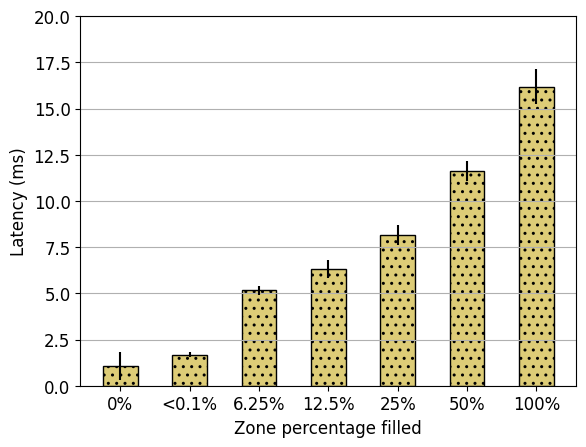

In [223]:
labels = ["0%", "<0.1%", "6.25%", "12.5%", "25%", "50%", "100%"]   
lats = [
    sum(reset_0) / len(reset_0) / 1000_000,
    sum(reset_1) / len(reset_1) / 1000_000,
    sum(reset_6) / len(reset_6) / 1000_000,
    sum(reset_12) / len(reset_12) / 1000_000,
    sum(reset_25) / len(reset_25) / 1000_000,
    sum(reset_50) / len(reset_50) / 1000_000,
    sum(reset_100) / len(reset_100) / 1000_000,
]
yerr= [
    stdef(reset_0) / 1000_000,
    stdef(reset_1) / 1000_000,
    stdef(reset_6) / 1000_000,
    stdef(reset_12) / 1000_000,
    stdef(reset_25) / 1000_000,
    stdef(reset_50) / 1000_000,
    stdef(reset_100) / 1000_000,
]

fig, ax = plt.subplots()
plt.ylabel("Latency (ms)")
plt.xlabel("Zone percentage filled")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 20)

ax.bar(range(len(labels)), lats, yerr=yerr, align='center', color=reset_col, 
       hatch=lbaf2_pattern, edgecolor = "black", ecolor="black", width = 0.5)
ax.set_xticks(range(len(labels)), labels=labels)
    
plt.savefig(f"{plot_dir}/f8-partial_zone_reset_latency.pdf")

print(sum(reset_0) / len(reset_0) / 1000_000)

1.0774044304171282
16.1866571627907
11.608276717977114
8.522756562938353


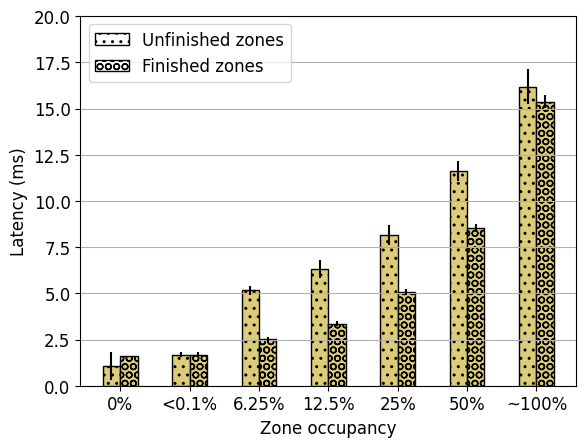

In [224]:
labels = ["0%", "<0.1%", "6.25%", "12.5%", "25%", "50%", "~100%"]

lats = [
    sum(reset_0) / len(reset_0) / 1000_000,
    sum(reset_1) / len(reset_1) / 1000_000,
    sum(reset_6) / len(reset_6) / 1000_000,
    sum(reset_12) / len(reset_12) / 1000_000,
    sum(reset_25) / len(reset_25) / 1000_000,
    sum(reset_50) / len(reset_50) / 1000_000,
    sum(reset_100) / len(reset_100) / 1000_000,
]

yerr= [
    stdef(reset_0) / 1000_000,
    stdef(reset_1) / 1000_000,
    stdef(reset_6) / 1000_000,
    stdef(reset_12) / 1000_000,
    stdef(reset_25) / 1000_000,
    stdef(reset_50) / 1000_000,
    stdef(reset_100) / 1000_000,
]

fig, ax = plt.subplots()
plt.ylabel("Latency (ms)")
plt.xlabel("Zone occupancy")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 20)

ax.bar([x - 0.125 for x in range(len(labels))], lats, yerr=yerr, align='center', color=reset_col, 
       hatch=lbaf2_pattern, edgecolor = "black", ecolor="black", width = 0.25)

lats = [
    sum(reset_fin_0) / len(reset_fin_0) / 1000_000,
    sum(reset_fin_1) / len(reset_fin_1) / 1000_000,
    sum(reset_fin_6) / len(reset_fin_6) / 1000_000,
    sum(reset_fin_12) / len(reset_fin_12) / 1000_000,
    sum(reset_fin_25) / len(reset_fin_25) / 1000_000,
    sum(reset_fin_50) / len(reset_fin_50) / 1000_000,
    sum(reset_fin_100) / len(reset_fin_100) / 1000_000,
]

yerr= [
    stdef(reset_fin_0) / 1000_000,
    stdef(reset_fin_1) / 1000_000,
    stdef(reset_fin_6) / 1000_000,
    stdef(reset_fin_12) / 1000_000,
    stdef(reset_fin_25) / 1000_000,
    stdef(reset_fin_50) / 1000_000,
    stdef(reset_fin_100) / 1000_000,
]

plot_512_patch = mpatches.Patch(facecolor='white', label='Unfinished zones', 
                                hatch='..', edgecolor = "black")
plot_4KiB_patch = mpatches.Patch(facecolor='white', label='Finished zones', 
                                 hatch='OO', edgecolor = "black")

plt.legend(handles = [plot_512_patch, plot_4KiB_patch], loc = 'upper left')


ax.bar([x + 0.125 for x in range(len(labels))], lats, yerr=yerr, align='center', color=reset_col, 
       hatch="OO", edgecolor = "black", ecolor="black", width=0.25)
ax.set_xticks(range(len(labels)), labels=labels)

plt.savefig(f"{plot_dir}/f8b-partial_zone_reset_latency.pdf") 

print(sum(reset_0) / len(reset_0) / 1000_000)
print(sum(reset_100) / len(reset_100) / 1000_000)

print(sum(reset_50) / len(reset_50) / 1000_000)
print(sum(reset_fin_50) / len(reset_fin_50) / 1000_000)

2709
13.545857881136952
907.5073302436323
3.0715570295311925


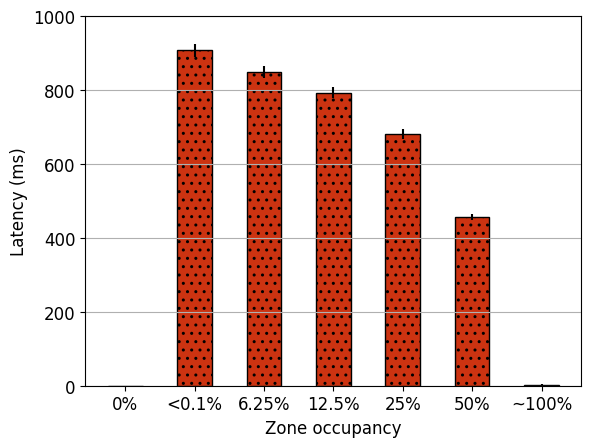

In [77]:
labels = ["0%", "<0.1%", "6.25%", "12.5%", "25%", "50%", "~100%"]
       
lats = [
    sum(fin_0) / len(fin_0) / 1000_000,
    sum(fin_1) / len(fin_1) / 1000_000,
    sum(fin_6) / len(fin_6) / 1000_000,
    sum(fin_12) / len(fin_12) / 1000_000,
    sum(fin_25) / len(fin_25) / 1000_000,
    sum(fin_50) / len(fin_50) / 1000_000,
    sum(fin_100) / len(fin_100) / 1000_000,
]

yerr= [
    stdef(fin_0) / 1000_000,
    stdef(fin_1) / 1000_000,
    stdef(fin_6) / 1000_000,
    stdef(fin_12) / 1000_000,
    stdef(fin_25) / 1000_000,
    stdef(fin_50) / 1000_000,
    stdef(fin_100) / 1000_000,
]

print(len(reset_0))

fig, ax = plt.subplots()
plt.ylabel("Latency (ms)")
plt.xlabel("Zone occupancy")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 1000)

ax.bar(range(len(labels)), lats, yerr=yerr, align='center', color=state_machine_col, 
       hatch=lbaf2_pattern, edgecolor = "black", ecolor="black", width = 0.5)
ax.set_xticks(range(len(labels)), labels=labels)
    
plt.savefig(f"{plot_dir}/f10-partial_zone_finish_latency.pdf")    

print(sum(fin_0) / len(fin_0) / 1000)
print(sum(fin_1) / len(fin_1) / 1000_000)
print(sum(fin_100) / len(fin_100) / 1000_000)

In [66]:
print((sum(fin_0) / len(fin_0) / 1000_000 + 
      sum(reset_fin_0) / len(reset_fin_0) / 1000_000) / 
      (sum(reset_0) / len(reset_0) / 1000_000))
print((sum(fin_1) / len(fin_1) / 1000_000 + 
      sum(reset_fin_1) / len(reset_fin_1) / 1000_000) / 
      (sum(reset_1) / len(reset_1) / 1000_000))
print((sum(fin_6) / len(fin_6) / 1000_000 + 
      sum(reset_fin_6) / len(reset_fin_6) / 1000_000) / 
      (sum(reset_6) / len(reset_6) / 1000_000))
print((sum(fin_12) / len(fin_12) / 1000_000 + 
      sum(reset_fin_12) / len(reset_fin_12) / 1000_000) / 
      (sum(reset_12) / len(reset_12) / 1000_000))
print((sum(fin_25) / len(fin_25) / 1000_000 + 
      sum(reset_fin_25) / len(reset_fin_25) / 1000_000) / 
      (sum(reset_25) / len(reset_25) / 1000_000))
print((sum(fin_50) / len(fin_50) / 1000_000 + 
      sum(reset_fin_50) / len(reset_fin_50) / 1000_000) / 
      (sum(reset_50) / len(reset_50) / 1000_000))

1.4888999412346353
539.1350152400848
165.0682184020997
126.04281661836956
84.25319367053211
40.08193656969211


# State machine

In [109]:
write_implicit_lat = []
write_explicit_lat = []
write_open_lat = []

append_implicit_lat = []
append_explicit_lat = []
append_open_lat = []

with ZipFile("../data/custom/zns-a/explicit_versus_implicit_io/run1.zip") as zf:
        with zf.open("run1", 'r') as f:
            lines = [l.decode("utf-8") for l in f.readlines()]
            write_implicit_lat = [int(line.split(',')[1]) for line in lines if 'write_implicit,' in line]
            write_explicit_lat = [int(line.split(',')[1]) for line in lines if 'write_explicit,' in line]
            write_open_lat = [int(line.split(',')[1]) for line in lines if 'write_implicit_opened,' in line]
            append_implicit_lat = [int(line.split(',')[1]) for line in lines if 'append_implicit,' in line]
            append_explicit_lat = [int(line.split(',')[1]) for line in lines if 'append_explicit,' in line]
            append_open_lat = [int(line.split(',')[1]) for line in lines if 'append_implicit_opened,' in line]

In [112]:
with open("../data/custom/zns-a/explicit_versus_implicit_io/run2_append_implicitly_opened", "r") as f:
    lines =  f.readlines()
    append_open_lat = append_open_lat + [int(line.split(',')[1]) for line in lines if 'append_implicit_opened,' in line]
        
with open("../data/custom/zns-a/explicit_versus_implicit_io/run2_write_implicitly_opened", "r") as f:
    lines =  f.readlines()
    write_open_lat = write_open_lat + [int(line.split(',')[1]) for line in lines if 'write_implicit_opened,' in line]
        
with open("../data/custom/zns-a/explicit_versus_implicit_io/run2_write_implicit", "r") as f:
    lines =  f.readlines()
    write_implicit_lat = write_implicit_lat + [int(line.split(',')[1]) for line in lines if 'write_implicit,' in line]
        
with open("../data/custom/zns-a/explicit_versus_implicit_io/run2_append_implicit", "r") as f:
    lines =  f.readlines()
    append_implicit_lat = append_implicit_lat + [int(line.split(',')[1]) for line in lines if 'append_implicit,' in line]
        
with open("../data/custom/zns-a/explicit_versus_implicit_io/run2_write_explicit", "r") as f:
    lines =  f.readlines()
    write_explicit_lat = write_explicit_lat +  [int(line.split(',')[1]) for line in lines if 'write_explicit,' in line]
        
with open("../data/custom/zns-a/explicit_versus_implicit_io/run2_append_explicit", "r") as f:
    lines =  f.readlines()
    append_explicit_lat = append_explicit_lat + [int(line.split(',')[1]) for line in lines if 'append_explicit,' in line]               

In [113]:
print(len(write_implicit_lat), sum(write_implicit_lat)/ len(write_implicit_lat))
print(len(write_explicit_lat), sum(write_explicit_lat)/ len(write_explicit_lat))
print(len(write_open_lat), sum(write_open_lat)/ len(write_open_lat))

print(len(append_implicit_lat), sum(append_implicit_lat)/ len(append_implicit_lat))
print(len(append_explicit_lat), sum(append_explicit_lat)/ len(append_explicit_lat))
print(len(append_open_lat), sum(append_open_lat)/ len(append_open_lat))

2857110 11622.546484384571
2857120 11621.906842554741
462 13641.926406926406
2857110 14660.668751640644
2857120 14659.775255502043
462 17491.948051948053


In [96]:
close_impl_lat = []
close_expl_lat = []

close_impl_write_lat = []
close_expl_write_lat = []
 
close_lat = []    
   
for filename in ["../data/custom/zns-a/open_close/run1", "../data/custom/zns-a/open_close/run2"]:  
    with open(filename, "r") as f:
        lines =  f.readlines()
        close_impl_lat = close_impl_lat + [int(line.split(',')[1]) for line in lines if 'close_implicit,' in line]
        close_expl_lat = close_expl_lat + [int(line.split(',')[1]) for line in lines if 'close,' in line]
        close_impl_write_lat = close_impl_write_lat + [int(line.split(',')[1]) for line in lines if 'close_implicit_write,' in line]
        close_expl_write_lat = close_expl_write_lat + [int(line.split(',')[1]) for line in lines if 'close_write,' in line]
        close_lat = close_impl_lat + close_expl_lat

In [97]:
print(len(close_impl_lat), sum(close_impl_lat)/ len(close_impl_lat))
print(len(close_expl_lat), sum(close_expl_lat)/ len(close_expl_lat))

print(len(close_impl_write_lat), sum(close_impl_write_lat)/ len(close_impl_write_lat))
print(len(close_expl_write_lat), sum(close_expl_write_lat)/ len(close_expl_write_lat))

print(len(close_lat), sum(close_lat)/ len(close_lat))

1826 11072.687294633079
1826 10963.296276013143
1826 15243.851040525738
1826 15190.297918948521
3652 11017.99178532311


In [98]:
open_dat = []
with open("../data/custom/zns-a/pure_read/fil", "r") as f:
    lines =  f.readlines()
    open_dat = [int(line.split(',')[1]) for line in lines if 'empty_' in line]

with open("../data/custom/zns-a/inteference/write_reset_inteference_fill_opens", "r") as f:
    lines =  f.readlines()
    open_dat = open_dat + [int(line.split(',')[1]) for line in lines if 'open' in line]  
    
with open("../data/custom/zns-a/inteference/append_reset_inteference_fill_opens", "r") as f:
    lines =  f.readlines()
    open_dat = open_dat + [int(line.split(',')[1]) for line in lines if 'open' in line]      
    
with open("../data/custom/zns-a/inteference/read_reset_inteference_fill_open", "r") as f:
    lines =  f.readlines()
    open_dat = open_dat + [int(line.split(',')[1]) for line in lines if 'open' in line]     

[9.559443548387097, 11.017991785323112]
11.407499999999999
11.45125
10.416


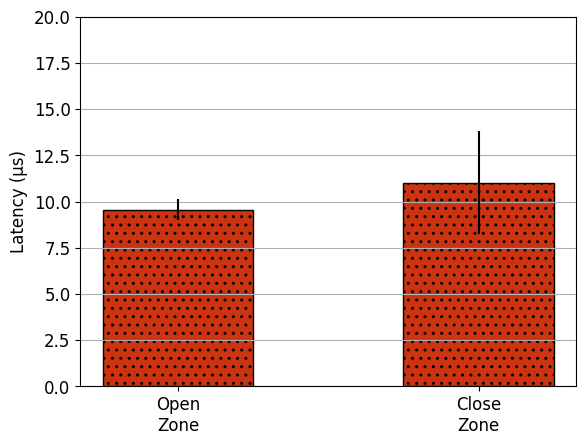

In [115]:
labels = ["Open\nZone", 
          "Close\nZone"
         ]

    
lats = [
    sum(open_dat) / len(open_dat) / 1000,
    sum(close_impl_lat + close_expl_lat) / len(close_impl_lat + close_expl_lat) / 1000,
]

yerr= [
    stdef(open_dat) / 1000,
    stdef(close_impl_lat + close_expl_lat) / 1000,
]

fig, ax = plt.subplots()
plt.ylabel("Latency (μs)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 20)

ax.bar([x * 0.5 for x in range(len(labels))], lats, yerr=yerr, align='center', color=state_machine_col, 
       hatch=lbaf2_pattern, edgecolor = "black", ecolor="black", width = 0.25)
ax.set_xticks([x * 0.5 for x in range(len(labels))], labels=labels)
plt.savefig(f"{plot_dir}/f9-state_machine_transitions.pdf")    

print(lats)
print(np.percentile([r / 1000 for r in close_impl_lat],95))
print(np.percentile([r / 1000 for r in close_expl_lat],95))
print(np.percentile([r / 1000 for r in open_dat],95))

# Append/write inteference on reads

13.042811250000002
25.6247575


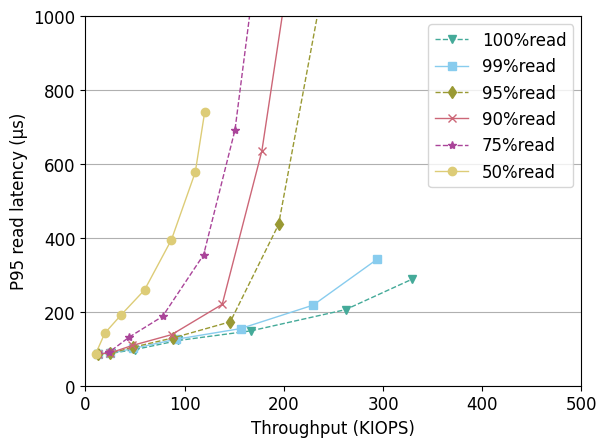

In [7]:
rw100 = []
rw99 = []
rw95 = []
rw90 = []
rw75 = []
rw50 = []

rw100p = []
rw99p = []
rw95p = []
rw90p = []
rw75p = []
rw50p = []

qds = [1,2,4,8,16,32,64]
ran = range(len(qds))

for qd in qds:
    rw100p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/100_{qd}.json"), 
                                       FioOperation.READ).lat_p95/ 1000)
    rw100.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/100_{qd}.json"), 
                                      FioOperation.READ).iops_mean / 1000)
    
for qd in qds:
    rw99p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/99_{qd}.json"), 
                                      FioOperation.READ).lat_p95/ 1000)
    rw99.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/99_{qd}.json"), 
                                     FioOperation.READ).iops_mean / 1000)

for qd in qds:
    rw95p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/95_{qd}.json"), 
                                      FioOperation.READ).lat_p95/ 1000)
    rw95.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/95_{qd}.json"), 
                                     FioOperation.READ).iops_mean / 1000)
  
for qd in qds:
    rw90p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/90_{qd}.json"), 
                                      FioOperation.READ).lat_p95/ 1000)
    rw90.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/90_{qd}.json"), 
                                     FioOperation.READ).iops_mean / 1000)
    
for qd in qds:
    rw75p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/75_{qd}.json"), 
                                      FioOperation.READ).lat_p95/ 1000)
    rw75.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/75_{qd}.json"), 
                                     FioOperation.READ).iops_mean / 1000)
    
for qd in qds:
    rw50p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/50_{qd}.json"), 
                                      FioOperation.READ).lat_p95/ 1000) 
    rw50.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/50_{qd}.json"), 
                                     FioOperation.READ).iops_mean / 1000)

fig, ax = plt.subplots()
plt.ylabel("P95 read latency (μs)")
plt.xlabel("Throughput (KIOPS)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 1000)
plt.xlim(0, 500)

plt.errorbar(
    rw100,
    rw100p,
    linewidth=1,
    label="100%read",
    color=write_col,
    fmt='--v',
)

plt.errorbar(
    rw99,
    rw99p,
    linewidth=1,
    label="99%read",
    color=write_none_col,
    fmt='-s',
)


plt.errorbar(
    rw95,
    rw95p,
    linewidth=1,
    label="95%read",
    color=write_mq_deadline_col,
    fmt='--d',
)


plt.errorbar(
    rw90,
    rw90p,
    linewidth=1,
    label="90%read",
    color=read_col,
    fmt='-x',
)

plt.errorbar(
    rw75,
    rw75p,
    linewidth=1,
    label="75%read",
    color=read_mq_deadline_col,
    fmt='--*',
)

plt.errorbar(
    rw50,
    rw50p,
    linewidth=1,
    label="50%read",
    color=reset_col,
    fmt='-o',
)

plt.legend()
fig.savefig(f"{plot_dir}/f11-inteference_rand_write_read.pdf")

14.01400875
27.629024583


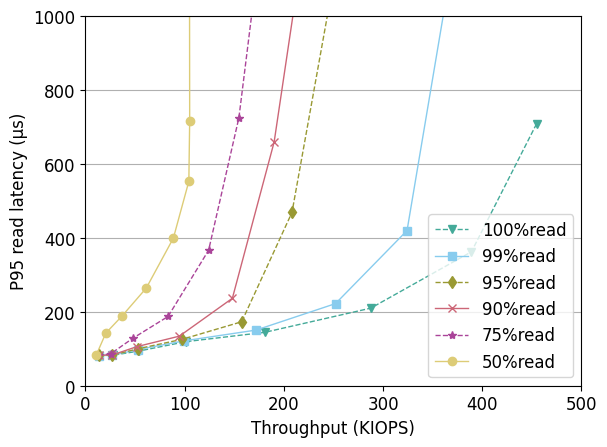

In [9]:
rw100 = []
rw99 = []
rw95 = []
rw90 = []
rw75 = []
rw50 = []

rw100p = []
rw99p = []
rw95p = []
rw90p = []
rw75p = []
rw50p = []

qds = [1,2,4,8,16,32,64,128]
ran = range(len(qds))

for qd in qds:
    rw100p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/spdk_100_{qd}.json"), 
                                       FioOperation.READ).lat_p95/ 1000)
    rw100.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/spdk_100_{qd}.json"),
                                      FioOperation.READ).iops_mean / 1000)
    
for qd in qds:
    rw99p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/spdk_99_{qd}.json"), 
                                      FioOperation.READ).lat_p95/ 1000)
    rw99.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/spdk_99_{qd}.json"),
                                     FioOperation.READ).iops_mean / 1000)

for qd in qds:
    rw95p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/spdk_95_{qd}.json"), 
                                      FioOperation.READ).lat_p95/ 1000)
    rw95.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/spdk_95_{qd}.json"),
                                     FioOperation.READ).iops_mean / 1000)
  
for qd in qds:
    rw90p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/spdk_90_{qd}.json"), 
                                      FioOperation.READ).lat_p95/ 1000)
    rw90.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/spdk_90_{qd}.json"), 
                                     FioOperation.READ).iops_mean / 1000)
    
for qd in qds:
    rw75p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/spdk_75_{qd}.json"), 
                                      FioOperation.READ).lat_p95/ 1000)
    rw75.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/spdk_75_{qd}.json"), 
                                     FioOperation.READ).iops_mean / 1000)
    
for qd in qds:
    rw50p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/spdk_50_{qd}.json"), 
                                      FioOperation.READ).lat_p95/ 1000) 
    rw50.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/spdk_50_{qd}.json"),
                                     FioOperation.READ).iops_mean / 1000)

fig, ax = plt.subplots()
plt.ylabel("P95 read latency (μs)")
plt.xlabel("Throughput (KIOPS)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 1000)
plt.xlim(0, 500)

    
plt.errorbar(
    rw100,
    rw100p,
    linewidth=1,
    label="100%read",
    color=write_col,
    fmt='--v',
)

plt.errorbar(
    rw99,
    rw99p,
    linewidth=1,
    label="99%read",
    color=write_none_col,
    fmt='-s',
)


plt.errorbar(
    rw95,
    rw95p,
    linewidth=1,
    label="95%read",
    color=write_mq_deadline_col,
    fmt='--d',
)


plt.errorbar(
    rw90,
    rw90p,
    linewidth=1,
    label="90%read",
    color=read_col,
    fmt='-x',
)

plt.errorbar(
    rw75,
    rw75p,
    linewidth=1,
    label="75%read",
    color=read_mq_deadline_col,
    fmt='--*',
)

plt.errorbar(
    rw50,
    rw50p,
    linewidth=1,
    label="50%read",
    color=reset_col,
    fmt='-o',
)

plt.legend()
fig.savefig(f"{plot_dir}/f12-inteference_rand_append_read.pdf")

92018.255157657
91878.16281173601
91958.434581212
89386.44944701501
91961.01464103401
92066.772842584
92216.28876599901
92542.280867576
[98041.856, 98041.856, 98041.856, 98041.856, 98041.856, 99090.432, 99090.432, 99090.432]
[0.0108875, 0.02175, 0.043514167, 0.087022093, 0.17397416699999999, 0.347823333, 0.694356667, 1.383670417]


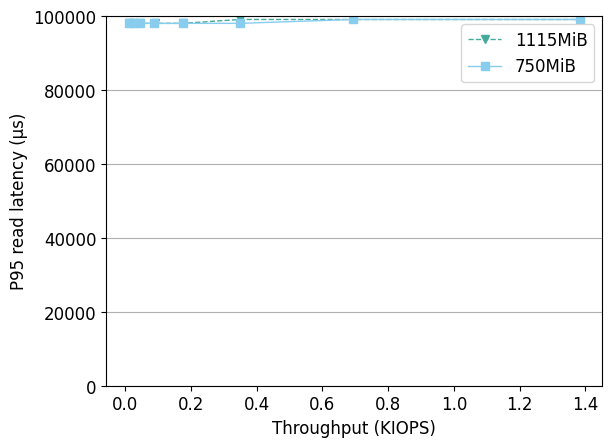

In [292]:
rw1115 = []
rw750 = []
rw250 = []
rw0 = []

rw1115p = []
rw750p = []
rw250p = []
rw0p = []

qds = [1,2,4,8,16,32,64,128]
ran = range(len(qds))

for qd in qds:
    rw1115p.append(parse_data_from_json(get_json(f"../data/custom/zns-a/long2/zns_append_{qd}_1115.json"), 
                                       FioOperation.READ, job=1).lat_p95/ 1000)
    rw1115.append(parse_data_from_json(get_json(f"../data/custom/zns-a/long2/zns_append_{qd}_1115.json"),
                                      FioOperation.READ, job=1).iops_mean / 1000)
    print(parse_data_from_json(get_json(f"../data/custom/zns-a/long2/zns_append_{qd}_1115.json"), 
                                       FioOperation.READ, job=1).lat_mean / 1000)
    
for qd in qds:
    rw750p.append(parse_data_from_json(get_json(f"../data/custom/zns-a/long2/zns_append_{qd}_750.json"), 
                                       FioOperation.READ, job=1).lat_p95/ 1000)
    rw750.append(parse_data_from_json(get_json(f"../data/custom/zns-a/long2/zns_append_{qd}_750.json"),
                                      FioOperation.READ, job=1).iops_mean / 1000)
    
for qd in qds:
    rw250p.append(parse_data_from_json(get_json(f"../data/custom/zns-a/long2/zns_append_{qd}_250.json"), 
                                       FioOperation.READ, job=1).lat_p95/ 1000)
    rw250.append(parse_data_from_json(get_json(f"../data/custom/zns-a/long2/zns_append_{qd}_250.json"),
                                      FioOperation.READ, job=1).iops_mean / 1000)
    
for qd in qds:
    rw0p.append(parse_data_from_json(get_json(f"../data/custom/zns-a/long2/zns_append_{qd}_0.json"), 
                                       FioOperation.READ).lat_p95/ 1000)
    rw0.append(parse_data_from_json(get_json(f"../data/custom/zns-a/long2/zns_append_{qd}_0.json"),
                                      FioOperation.READ).iops_mean / 1000)
    
    
    
fig, ax = plt.subplots()
plt.ylabel("P95 read latency (μs)")
plt.xlabel("Throughput (KIOPS)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 100000)
# plt.xlim(0, 1000)
# ax.set_xscale('log')
# ax.set_yscale('log')
    
plt.errorbar(
    rw1115,
    rw1115p,
    linewidth=1,
    label="1115MiB",
    color=write_col,
    fmt='--v',
)

plt.errorbar(
    rw750,
    rw750p,
    linewidth=1,
    label="750MiB",
    color=write_none_col,
    fmt='-s',
)


# plt.errorbar(
#     rw250,
#     rw250p,
#     linewidth=1,
#     label="250 MiB",
#     color=write_mq_deadline_col,
#     fmt='--d',
# )


# plt.errorbar(
#     rw0,
#     rw0p,
#     linewidth=1,
#     label="0 MiB",
#     color=read_col,
#     fmt='-x',
# )


plt.legend()
fig.savefig(f"{plot_dir}/f12-inteference_rand_append_read.pdf")

print(rw1115p)
print(rw750)

92018.255157657
91878.16281173601
91958.434581212
89386.44944701501
91961.01464103401
92066.772842584
92216.28876599901
92542.280867576


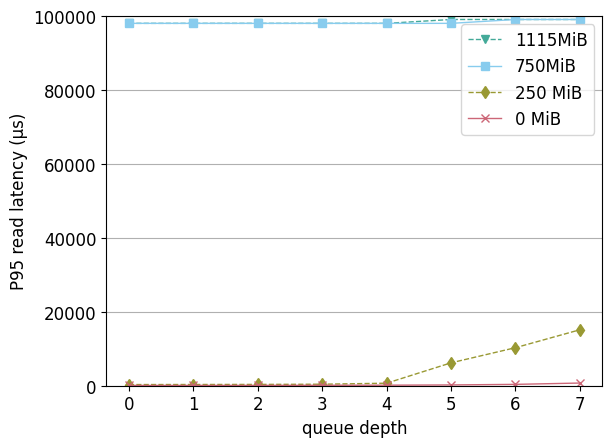

In [319]:
rw1115 = []
rw750 = []
rw250 = []
rw0 = []

rw1115p = []
rw750p = []
rw250p = []
rw0p = []

qds = [1,2,4,8,16,32,64,128]
ran = range(len(qds))

for qd in qds:
    rw1115p.append(parse_data_from_json(get_json(f"../data/custom/zns-a/long2/zns_append_{qd}_1115.json"), 
                                       FioOperation.READ, job=1).lat_p95/ 1000)
    rw1115.append(parse_data_from_json(get_json(f"../data/custom/zns-a/long2/zns_append_{qd}_1115.json"),
                                      FioOperation.READ, job=1).iops_mean / 1000)
    print(parse_data_from_json(get_json(f"../data/custom/zns-a/long2/zns_append_{qd}_1115.json"), 
                                       FioOperation.READ, job=1).lat_mean / 1000)
    
for qd in qds:
    rw750p.append(parse_data_from_json(get_json(f"../data/custom/zns-a/long2/zns_append_{qd}_750.json"), 
                                       FioOperation.READ, job=1).lat_p95/ 1000)
    rw750.append(parse_data_from_json(get_json(f"../data/custom/zns-a/long2/zns_append_{qd}_750.json"),
                                      FioOperation.READ, job=1).iops_mean / 1000)
    
for qd in qds:
    rw250p.append(parse_data_from_json(get_json(f"../data/custom/zns-a/long2/zns_append_{qd}_250.json"), 
                                       FioOperation.READ, job=1).lat_p95/ 1000)
    rw250.append(parse_data_from_json(get_json(f"../data/custom/zns-a/long2/zns_append_{qd}_250.json"),
                                      FioOperation.READ, job=1).iops_mean / 1000)
    
for qd in qds:
    rw0p.append(parse_data_from_json(get_json(f"../data/custom/zns-a/long2/zns_append_{qd}_0.json"), 
                                       FioOperation.READ).lat_p95/ 1000)
    rw0.append(parse_data_from_json(get_json(f"../data/custom/zns-a/long2/zns_append_{qd}_0.json"),
                                      FioOperation.READ).iops_mean / 1000)
    
    
    
fig, ax = plt.subplots()
plt.ylabel("P95 read latency (μs)")
plt.xlabel("queue depth")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 100000)
# plt.xlim(0, 1000)
# ax.set_xscale('log')
#ax.set_yscale('log')
    
plt.errorbar(
    range(len(rw1115p)),
    rw1115p,
    linewidth=1,
    label="1115MiB",
    color=write_col,
    fmt='--v',
)

plt.errorbar(
    range(len(rw1115p)),
    rw750p,
    linewidth=1,
    label="750MiB",
    color=write_none_col,
    fmt='-s',
)


plt.errorbar(
    range(len(rw1115p)),
    rw250p,
    linewidth=1,
    label="250 MiB",
    color=write_mq_deadline_col,
    fmt='--d',
)


plt.errorbar(
    range(len(rw1115p)),
    rw0p,
    linewidth=1,
    label="0 MiB",
    color=read_col,
    fmt='-x',
)


plt.legend()
fig.savefig(f"{plot_dir}/f12-inteference_rand_append_read.pdf")

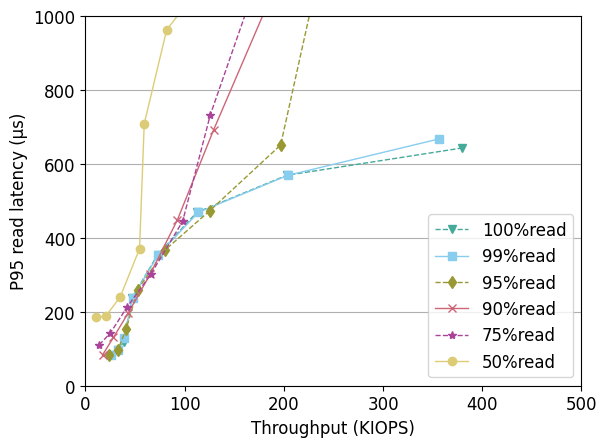

In [11]:
rw100 = []
rw99 = []
rw95 = []
rw90 = []
rw75 = []
rw50 = []

rw100p = []
rw99p = []
rw95p = []
rw90p = []
rw75p = []
rw50p = []

qds = [1,2,4,8,16,32,64, 128]
ran = range(len(qds))

for qd in qds:
    rw100p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/100_nvme_{qd}.json"), 
                                       FioOperation.READ).lat_p95/ 1000)
    rw100.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/100_nvme_{qd}.json"),
                                      FioOperation.READ).iops_mean / 1000)
    
for qd in qds:
    rw99p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/99_nvme_{qd}.json"), 
                                      FioOperation.READ).lat_p95/ 1000)
    rw99.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/99_nvme_{qd}.json"),
                                     FioOperation.READ).iops_mean / 1000)

for qd in qds:
    rw95p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/95_nvme_{qd}.json"),
                                      FioOperation.READ).lat_p95/ 1000)
    rw95.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/95_nvme_{qd}.json"), 
                                     FioOperation.READ).iops_mean / 1000)
  
for qd in qds:
    rw90p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/90_nvme_{qd}.json"),
                                      FioOperation.READ).lat_p95/ 1000)
    rw90.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/90_nvme_{qd}.json"), 
                                     FioOperation.READ).iops_mean / 1000)
    
for qd in qds:
    rw75p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/75_nvme_{qd}.json"),
                                      FioOperation.READ).lat_p95/ 1000)
    rw75.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/75_nvme_{qd}.json"), 
                                     FioOperation.READ).iops_mean / 1000)
    
for qd in qds:
    rw50p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/50_nvme_{qd}.json"),
                                      FioOperation.READ).lat_p95/ 1000) 
    rw50.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/50_nvme_{qd}.json"),
                                     FioOperation.READ).iops_mean / 1000)

fig, ax = plt.subplots()
plt.ylabel("P95 read latency (μs)")
plt.xlabel("Throughput (KIOPS)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 1000)
plt.xlim(0, 500)
    
plt.errorbar(
    rw100,
    rw100p,
    linewidth=1,
    label="100%read",
    color=write_col,
    fmt='--v',
)

plt.errorbar(
    rw99,
    rw99p,
    linewidth=1,
    label="99%read",
    color=write_none_col,
    fmt='-s',
)


plt.errorbar(
    rw95,
    rw95p,
    linewidth=1,
    label="95%read",
    color=write_mq_deadline_col,
    fmt='--d',
)


plt.errorbar(
    rw90,
    rw90p,
    linewidth=1,
    label="90%read",
    color=read_col,
    fmt='-x',
)

plt.errorbar(
    rw75,
    rw75p,
    linewidth=1,
    label="75%read",
    color=read_mq_deadline_col,
    fmt='--*',
)

plt.errorbar(
    rw50,
    rw50p,
    linewidth=1,
    label="50%read",
    color=reset_col,
    fmt='-o',
)

plt.legend()
fig.savefig(f"{plot_dir}/f11b-inteference_rand_nvme_write_read.pdf")

13.042811250000002
25.6247575


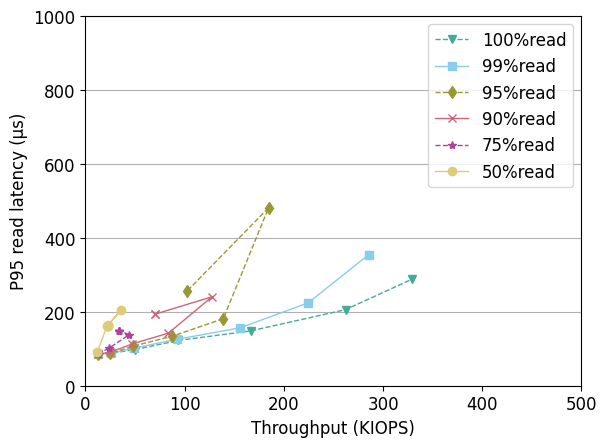

In [14]:
rw100 = []
rw99 = []
rw95 = []
rw90 = []
rw75 = []
rw50 = []

rw100p = []
rw99p = []
rw95p = []
rw90p = []
rw75p = []
rw50p = []

qds = [1,2,4,8,16,32,64]
ran = range(len(qds))

for qd in qds:
    rw100p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/100_{qd}.json"), 
                                       FioOperation.READ).lat_p95/ 1000)
    rw100.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/100_{qd}.json"), 
                                      FioOperation.READ).iops_mean / 1000)
    
for qd in qds:
    rw99p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/99_flow_sleep_{qd}.json"),
                                      FioOperation.READ).lat_p95/ 1000)
    rw99.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/99_flow_sleep_{qd}.json"),
                                     FioOperation.READ).iops_mean / 1000)

for qd in qds:
    rw95p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/95_flow_sleep_{qd}.json"),
                                      FioOperation.READ).lat_p95/ 1000)
    rw95.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/95_flow_sleep_{qd}.json"), 
                                     FioOperation.READ).iops_mean / 1000)
  
for qd in qds:
    rw90p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/90_flow_sleep_{qd}.json"), 
                                      FioOperation.READ).lat_p95/ 1000)
    rw90.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/90_flow_sleep_{qd}.json"), 
                                     FioOperation.READ).iops_mean / 1000)
    
for qd in qds:
    rw75p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/75_flow_sleep_{qd}.json"),
                                      FioOperation.READ).lat_p95/ 1000)
    rw75.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/75_flow_sleep_{qd}.json"),
                                     FioOperation.READ).iops_mean / 1000)
    
for qd in qds:
    rw50p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/50_flow_sleep_{qd}.json"),
                                      FioOperation.READ).lat_p95/ 1000) 
    rw50.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/50_flow_sleep_{qd}.json"),
                                     FioOperation.READ).iops_mean / 1000)

fig, ax = plt.subplots()
plt.ylabel("P95 read latency (μs)")
plt.xlabel("Throughput (KIOPS)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 1000)
plt.xlim(0, 500)


print(rw100[0])
print(rw100[1])
    
plt.errorbar(
    rw100,
    rw100p,
    linewidth=1,
    label="100%read",
    color=write_col,
    fmt='--v',
)

plt.errorbar(
    rw99,
    rw99p,
    linewidth=1,
    label="99%read",
    color=write_none_col,
    fmt='-s',
)


plt.errorbar(
    rw95,
    rw95p,
    linewidth=1,
    label="95%read",
    color=write_mq_deadline_col,
    fmt='--d',
)


plt.errorbar(
    rw90,
    rw90p,
    linewidth=1,
    label="90%read",
    color=read_col,
    fmt='-x',
)

plt.errorbar(
    rw75,
    rw75p,
    linewidth=1,
    label="75%read",
    color=read_mq_deadline_col,
    fmt='--*',
)

plt.errorbar(
    rw50,
    rw50p,
    linewidth=1,
    label="50%read",
    color=reset_col,
    fmt='-o',
)

plt.legend()
fig.savefig(f"{plot_dir}/f11-inteference_rand_write_flow_read.pdf")

[82.432, 95.744, 119.296, 238.592]
14.01400875
27.629024583


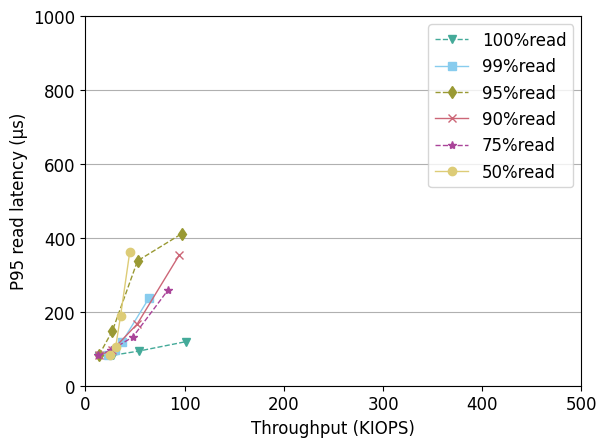

In [17]:
rw100 = []
rw99 = []
rw95 = []
rw90 = []
rw75 = []
rw50 = []

rw100p = []
rw99p = []
rw95p = []
rw90p = []
rw75p = []
rw50p = []

qds = [1,2,4,8]
ran = range(len(qds))

for qd in qds:
    rw100p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/spdk_100_{qd}.json"),
                                       FioOperation.READ).clat_p95/ 1000)
    rw100.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/spdk_100_{qd}.json"), 
                                      FioOperation.READ).iops_mean / 1000)
    
for qd in qds:
    rw99p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/spdk_99_conc_{qd}.json"), 
                                      FioOperation.READ).clat_p95/ 1000)
    rw99.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/spdk_99_conc_{qd}.json"),
                                     FioOperation.READ).iops_mean / 1000)

print(rw99p)
    
for qd in qds:
    rw95p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/spdk_95_conc_{qd}.json"),
                                      FioOperation.READ).clat_p95/ 1000)
    rw95.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/spdk_95_{qd}.json"),
                                     FioOperation.READ).iops_mean / 1000)
  
for qd in qds:
    rw90p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/spdk_90_conc_{qd}.json"), 
                                      FioOperation.READ).clat_p95/ 1000)
    rw90.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/spdk_90_{qd}.json"),
                                     FioOperation.READ).iops_mean / 1000)
    
for qd in qds:
    rw75p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/spdk_75_conc_{qd}.json"),
                                      FioOperation.READ).clat_p95/ 1000)
    rw75.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/spdk_75_{qd}.json"),
                                     FioOperation.READ).iops_mean / 1000)
    
for qd in qds:
    rw50p.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/spdk_50_conc_{qd}.json"), 
                                      FioOperation.READ).clat_p95/ 1000) 
    rw50.append(parse_data_from_json(get_json(f"../data/inteference/mixratio/spdk_50_conc_{qd}.json"), 
                                     FioOperation.READ).iops_mean / 1000)

fig, ax = plt.subplots()
plt.ylabel("P95 read latency (μs)")
plt.xlabel("Throughput (KIOPS)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 1000)
plt.xlim(0, 500)

print(rw100[0])
print(rw100[1])
    
plt.errorbar(
    rw100,
    rw100p,
    linewidth=1,
    label="100%read",
    color=write_col,
    fmt='--v',
)

plt.errorbar(
    rw99,
    rw99p,
    linewidth=1,
    label="99%read",
    color=write_none_col,
    fmt='-s',
)


plt.errorbar(
    rw95,
    rw95p,
    linewidth=1,
    label="95%read",
    color=write_mq_deadline_col,
    fmt='--d',
)


plt.errorbar(
    rw90,
    rw90p,
    linewidth=1,
    label="90%read",
    color=read_col,
    fmt='-x',
)

plt.errorbar(
    rw75,
    rw75p,
    linewidth=1,
    label="75%read",
    color=read_mq_deadline_col,
    fmt='--*',
)

plt.errorbar(
    rw50,
    rw50p,
    linewidth=1,
    label="50%read",
    color=reset_col,
    fmt='-o',
)

plt.legend()
fig.savefig(f"{plot_dir}/f12b-inteference_rand_conc_write_read.pdf")

[13.667975, 26.956158332999998, 52.413886111, 98.984913889, 176.05518384400003, 280.08578333300005, 378.36351111100004, 445.127408333, 459.98998055600003]
[81.408, 82.432, 94.72, 119.296, 146.432, 211.968, 366.592, 716.8, 1138.688]
[7.711816156, 15.403423398000001, 29.97716156, 54.848713092, 89.17047632299999, 122.446754875, 150.043428969, 170.670381616, 180.174339833]
[261.12, 268.288, 296.96, 350.208, 460.8, 741.376, 1269.76, 2211.84, 3260.416]


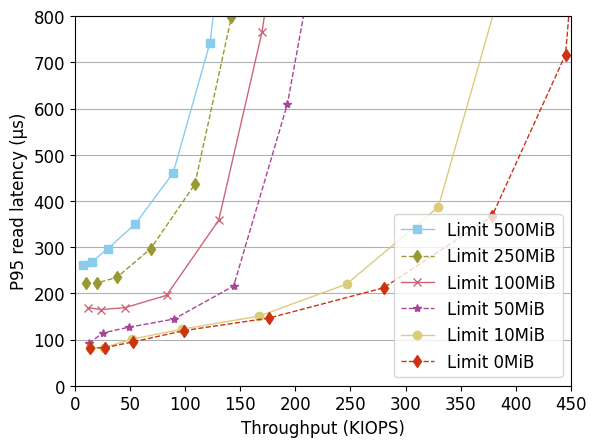

In [123]:
t500 = []
t500p = []
t250 = []
t250p = []
t100 = []
t100p = []
t50 = []
t50p = []
t10 = []
t10p = []
t0 = []
t0p = []

for qd in [1, 2, 4, 8, 16, 32, 64, 128, 256]:
    t500p.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/nvme_500_{qd}"), 
                                      FioOperation.READ, job=1).lat_p95/ 1000)
    t500.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/nvme_500_{qd}"), 
                                     FioOperation.READ, job=1).iops_mean / 1000)
    
for qd in [1, 2, 4, 8, 16, 32, 64, 128, 256]:
    t250p.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/nvme_250_{qd}"), 
                                      FioOperation.READ, job=1).lat_p95/ 1000)
    t250.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/nvme_250_{qd}"),
                                     FioOperation.READ, job=1).iops_mean / 1000)
    
for qd in [1, 2, 4, 8, 16, 32, 64, 128, 256]:
    t100p.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/nvme_100_{qd}"),
                                      FioOperation.READ, job=1).lat_p95/ 1000)
    t100.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/nvme_100_{qd}"),
                                     FioOperation.READ, job=1).iops_mean / 1000)

    
for qd in [1, 2, 4, 8, 16, 32, 64, 128, 256]:
    t50p.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/nvme_50_{qd}"), 
                                     FioOperation.READ, job=1).lat_p95/ 1000)
    t50.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/nvme_50_{qd}"), 
                                    FioOperation.READ, job=1).iops_mean / 1000)
    
for qd in [1, 2, 4, 8, 16, 32, 64, 128, 256]:
    t10p.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/nvme_10_{qd}"),
                                       FioOperation.READ, job=1).lat_p95/ 1000)
    t10.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/nvme_10_{qd}"), 
                                      FioOperation.READ, job=1).iops_mean / 1000)    
    
for qd in [1, 2, 4, 8, 16, 32, 64, 128, 256]:
    t0p.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/nvme_0_{qd}"),
                                       FioOperation.READ).lat_p95/ 1000)
    t0.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/nvme_0_{qd}"), 
                                      FioOperation.READ).iops_mean / 1000)
    
fig, ax = plt.subplots()
plt.ylabel("P95 read latency (μs)")
plt.xlabel("Throughput (KIOPS)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 800)
plt.xlim(0, 450)
    
# plt.errorbar(
#     t1000,
#     t1000p,
#     linewidth=1,
#     label="Limit 1000MiB",
#     color=write_col,
#     fmt='--v',
# )

plt.errorbar(
    t500,
    t500p,
    linewidth=1,
    label="Limit 500MiB",
    color=write_none_col,
    fmt='-s',
)


plt.errorbar(
    t250,
    t250p,
    linewidth=1,
    label="Limit 250MiB",
    color=write_mq_deadline_col,
    fmt='--d',
)


plt.errorbar(
    t100,
    t100p,
    linewidth=1,
    label="Limit 100MiB",
    color=read_col,
    fmt='-x',
)

plt.errorbar(
    t50,
    t50p,
    linewidth=1,
    label="Limit 50MiB",
    color=read_mq_deadline_col,
    fmt='--*',
)

plt.errorbar(
    t10,
    t10p,
    linewidth=1,
    label="Limit 10MiB",
    color=reset_col,
    fmt='-o',
)

plt.errorbar(
    t0,
    t0p,
    linewidth=1,
    label="Limit 0MiB",
    color=state_machine_col,
    fmt='--d',
)

plt.legend(loc='lower right')
fig.savefig(f"{plot_dir}/f12-inteference_rand_read_seq_write_rate_nvme.pdf")

print(t0)
print(t0p)

print(t500)
print(t500p)

[7.745309192, 15.456019499, 30.122270195000002, 55.077231198, 89.68360445699999, 123.170746518, 150.781504178, 171.956250696, 177.973657382]
[261.12, 268.288, 292.864, 350.208, 456.704, 733.184, 1269.76, 2244.608, 3391.488]


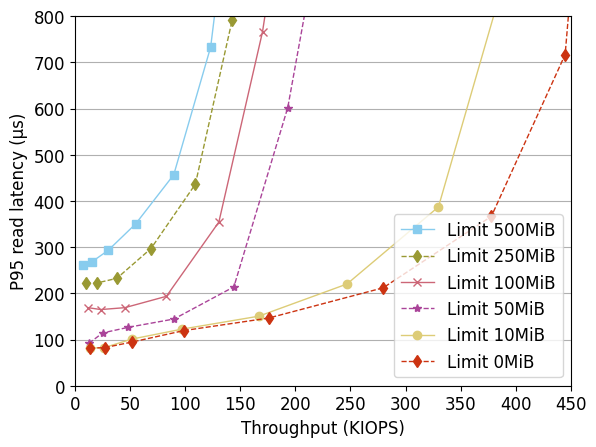

In [121]:
t500 = []
t500p = []
t250 = []
t250p = []
t100 = []
t100p = []
t50 = []
t50p = []
t10 = []
t10p = []
t0 = []
t0p = []

for qd in [1, 2, 4, 8, 16, 32, 64, 128, 256]:
    t500p.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/zns_500_{qd}"), 
                                      FioOperation.READ, job=1).lat_p95/ 1000)
    t500.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/zns_500_{qd}"), 
                                     FioOperation.READ, job=1).iops_mean / 1000)
    
for qd in [1, 2, 4, 8, 16, 32, 64, 128, 256]:
    t250p.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/zns_250_{qd}"), 
                                      FioOperation.READ, job=1).lat_p95/ 1000)
    t250.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/zns_250_{qd}"),
                                     FioOperation.READ, job=1).iops_mean / 1000)
    
for qd in [1, 2, 4, 8, 16, 32, 64, 128, 256]:
    t100p.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/zns_100_{qd}"),
                                      FioOperation.READ, job=1).lat_p95/ 1000)
    t100.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/zns_100_{qd}"),
                                     FioOperation.READ, job=1).iops_mean / 1000)

    
for qd in [1, 2, 4, 8, 16, 32, 64, 128, 256]:
    t50p.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/zns_50_{qd}"), 
                                     FioOperation.READ, job=1).lat_p95/ 1000)
    t50.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/zns_50_{qd}"), 
                                    FioOperation.READ, job=1).iops_mean / 1000)
    
for qd in [1, 2, 4, 8, 16, 32, 64, 128, 256]:
    t10p.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/zns_10_{qd}"),
                                       FioOperation.READ, job=1).lat_p95/ 1000)
    t10.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/zns_10_{qd}"), 
                                      FioOperation.READ, job=1).iops_mean / 1000)    
    
for qd in [1, 2, 4, 8, 16, 32, 64, 128, 256]:
    t0p.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/zns_0_{qd}"),
                                       FioOperation.READ).lat_p95/ 1000)
    t0.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/zns_0_{qd}"), 
                                      FioOperation.READ).iops_mean / 1000)
    
fig, ax = plt.subplots()
plt.ylabel("P95 read latency (μs)")
plt.xlabel("Throughput (KIOPS)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 800)
plt.xlim(0, 450)
    
# plt.errorbar(
#     t1000,
#     t1000p,
#     linewidth=1,
#     label="Limit 1000MiB",
#     color=write_col,
#     fmt='--v',
# )

plt.errorbar(
    t500,
    t500p,
    linewidth=1,
    label="Limit 500MiB",
    color=write_none_col,
    fmt='-s',
)


plt.errorbar(
    t250,
    t250p,
    linewidth=1,
    label="Limit 250MiB",
    color=write_mq_deadline_col,
    fmt='--d',
)


plt.errorbar(
    t100,
    t100p,
    linewidth=1,
    label="Limit 100MiB",
    color=read_col,
    fmt='-x',
)

plt.errorbar(
    t50,
    t50p,
    linewidth=1,
    label="Limit 50MiB",
    color=read_mq_deadline_col,
    fmt='--*',
)

plt.errorbar(
    t10,
    t10p,
    linewidth=1,
    label="Limit 10MiB",
    color=reset_col,
    fmt='-o',
)

plt.errorbar(
    t0,
    t0p,
    linewidth=1,
    label="Limit 0MiB",
    color=state_machine_col,
    fmt='--d',
)

plt.legend(loc='lower right')
fig.savefig(f"{plot_dir}/f12b-inteference_rand_read_seq_write_rate_zns.pdf")
print(t500)
print(t500p)

[7.7509442900000005, 15.451451253, 30.102543174999997, 55.080983287, 89.61045961, 123.196250696, 150.84031197800002, 171.76448467999998, 178.183089136]
[261.12, 268.288, 296.96, 350.208, 456.704, 733.184, 1269.76, 2244.608, 3391.488]
[13.618755556, 26.854261111, 52.234454039, 98.702238889, 175.72326388899998, 279.676361111, 377.91459999999995, 444.816630556, 459.087969444]
[81.408, 82.432, 94.72, 119.296, 146.432, 211.968, 366.592, 716.8, 1122.304]


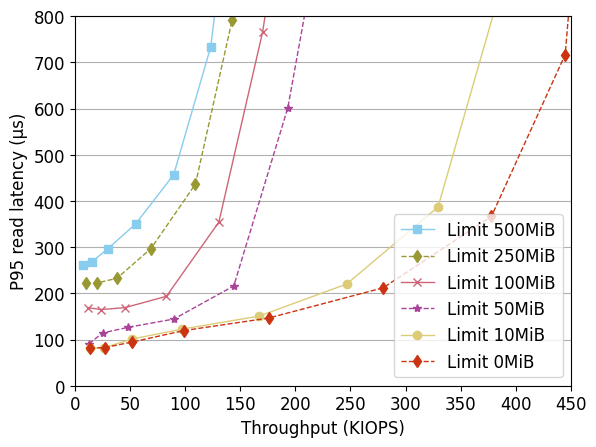

In [126]:
t500 = []
t500p = []
t250 = []
t250p = []
t100 = []
t100p = []
t50 = []
t50p = []
t10 = []
t10p = []
t0 = []
t0p = []

for qd in [1, 2, 4, 8, 16, 32, 64, 128, 256]:
    t500p.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/zns_append_500_{qd}"), 
                                      FioOperation.READ, job=1).lat_p95/ 1000)
    t500.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/zns_append_500_{qd}"), 
                                     FioOperation.READ, job=1).iops_mean / 1000)
    
for qd in [1, 2, 4, 8, 16, 32, 64, 128, 256]:
    t250p.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/zns_append_250_{qd}"), 
                                      FioOperation.READ, job=1).lat_p95/ 1000)
    t250.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/zns_append_250_{qd}"),
                                     FioOperation.READ, job=1).iops_mean / 1000)
    
for qd in [1, 2, 4, 8, 16, 32, 64, 128, 256]:
    t100p.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/zns_append_100_{qd}"),
                                      FioOperation.READ, job=1).lat_p95/ 1000)
    t100.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/zns_append_100_{qd}"),
                                     FioOperation.READ, job=1).iops_mean / 1000)

    
for qd in [1, 2, 4, 8, 16, 32, 64, 128, 256]:
    t50p.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/zns_append_50_{qd}"), 
                                     FioOperation.READ, job=1).lat_p95/ 1000)
    t50.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/zns_append_50_{qd}"), 
                                    FioOperation.READ, job=1).iops_mean / 1000)
    
for qd in [1, 2, 4, 8, 16, 32, 64, 128, 256]:
    t10p.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/zns_append_10_{qd}"),
                                       FioOperation.READ, job=1).lat_p95/ 1000)
    t10.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/zns_append_10_{qd}"), 
                                      FioOperation.READ, job=1).iops_mean / 1000)    
    
for qd in [1, 2, 4, 8, 16, 32, 64, 128, 256]:
    t0p.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/zns_append_0_{qd}"),
                                       FioOperation.READ).lat_p95/ 1000)
    t0.append(parse_data_from_json(get_json(f"../data/custom/zns-a/rate_inteference/zns_append_0_{qd}"), 
                                      FioOperation.READ).iops_mean / 1000)
    
fig, ax = plt.subplots()
plt.ylabel("P95 read latency (μs)")
plt.xlabel("Throughput (KIOPS)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 800)
plt.xlim(0, 450)
    
# plt.errorbar(
#     t1000,
#     t1000p,
#     linewidth=1,
#     label="Limit 1000MiB",
#     color=write_col,
#     fmt='--v',
# )

plt.errorbar(
    t500,
    t500p,
    linewidth=1,
    label="Limit 500MiB",
    color=write_none_col,
    fmt='-s',
)


plt.errorbar(
    t250,
    t250p,
    linewidth=1,
    label="Limit 250MiB",
    color=write_mq_deadline_col,
    fmt='--d',
)


plt.errorbar(
    t100,
    t100p,
    linewidth=1,
    label="Limit 100MiB",
    color=read_col,
    fmt='-x',
)

plt.errorbar(
    t50,
    t50p,
    linewidth=1,
    label="Limit 50MiB",
    color=read_mq_deadline_col,
    fmt='--*',
)

plt.errorbar(
    t10,
    t10p,
    linewidth=1,
    label="Limit 10MiB",
    color=reset_col,
    fmt='-o',
)

plt.errorbar(
    t0,
    t0p,
    linewidth=1,
    label="Limit 0MiB",
    color=state_machine_col,
    fmt='--d',
)

plt.legend(loc='lower right')
fig.savefig(f"{plot_dir}/f12b-inteference_rand_read_seq_append_rate_zns.pdf")
print(t500)
print(t500p)

print(t0)
print(t0p)

In [38]:
print(t0)
print(t0p)

[13.625772222, 26.860394444, 52.2274, 98.691411111, 175.729569444, 279.70725905300003]
[81.408, 82.432, 94.72, 119.296, 146.432, 211.968]


In [404]:
bandwidth_write1_zns = []
bandwidth_write2_zns = []
bandwidth_write3_zns = []
bandwidth_write4_zns = []
with open("../data/custom/zns-a/long2/log_zns_32_1115_bw.1.log", "r") as f:
    bandwidth_write1_zns = [int(line.split(',')[1]) for line in  f.readlines() if len(line.split(',')) > 1]
with open("../data/custom/zns-a/long2/log_zns_32_1115_bw.2.log", "r") as f:
    bandwidth_write2_zns = [int(line.split(',')[1]) for line in  f.readlines() if len(line.split(',')) > 1]
with open("../data/custom/zns-a/long2/log_zns_32_1115_bw.3.log", "r") as f:
    bandwidth_write3_zns = [int(line.split(',')[1]) for line in  f.readlines() if len(line.split(',')) > 1]
with open("../data/custom/zns-a/long2/log_zns_32_1115_bw.4.log", "r") as f:
    bandwidth_write4_zns = [int(line.split(',')[1]) for line in  f.readlines() if len(line.split(',')) > 1]
bandwidth_write_zns = [x[0] + x[1] + x[2] + x[3] for x in zip(bandwidth_write1_zns, 
                                                          bandwidth_write2_zns, bandwidth_write3_zns,
                                                          bandwidth_write4_zns)]


bandwidth_write1_2 = []
bandwidth_write2_2 = []
bandwidth_write3_2 = []
bandwidth_write4_2 = []
with open("../data/custom/zns-a/long3/log_32_1115_bw.1.log", "r") as f:
    bandwidth_write1_2 = [int(line.split(',')[1]) for line in  f.readlines() if len(line.split(',')) > 1]
with open("../data/custom/zns-a/long3/log_32_1115_bw.2.log", "r") as f:
    bandwidth_write2_2 = [int(line.split(',')[1]) for line in  f.readlines() if len(line.split(',')) > 1]
with open("../data/custom/zns-a/long3/log_32_1115_bw.3.log", "r") as f:
    bandwidth_write3_2 = [int(line.split(',')[1]) for line in  f.readlines() if len(line.split(',')) > 1]
with open("../data/custom/zns-a/long3/log_32_1115_bw.4.log", "r") as f:
    bandwidth_write4_2 = [int(line.split(',')[1]) for line in  f.readlines() if len(line.split(',')) > 1]
bandwidth_write_2 = [x[0] + x[1] + x[2] + x[3] for x in zip(bandwidth_write1_2, 
                                                          bandwidth_write2_2, bandwidth_write3_2,
                                                          bandwidth_write4_2)]


bandwidth_write1_2 = []
bandwidth_write2_2 = []
bandwidth_write3_2 = []
bandwidth_write4_2 = []
with open("../data/custom/zns-a/long/finally_b.1.log", "r") as f:
    bandwidth_write1_2 = [int(line.split(',')[1]) for line in  f.readlines() if len(line.split(',')) > 1]
with open("../data/custom/zns-a/long/finally_b.2.log", "r") as f:
    bandwidth_write2_2 = [int(line.split(',')[1]) for line in  f.readlines() if len(line.split(',')) > 1]
with open("../data/custom/zns-a/long/finally_b.3.log", "r") as f:
    bandwidth_write3_2 = [int(line.split(',')[1]) for line in  f.readlines() if len(line.split(',')) > 1]
with open("../data/custom/zns-a/long/finally_b.4.log", "r") as f:
    bandwidth_write4_2 = [int(line.split(',')[1]) for line in  f.readlines() if len(line.split(',')) > 1]
bandwidth_write_3 = [x[0] + x[1] + x[2] + x[3] for x in zip(bandwidth_write1_2, 
                                                          bandwidth_write2_2, bandwidth_write3_2,
                                                          bandwidth_write4_2)]

bandwidth_read = []
with open("../data/custom/zns-a/long2/log_zns_32_1115_bw.5.log", "r") as f:
    bandwidth_read = [int(line.split(',')[1]) for line in  f.readlines() if len(line.split(',')) > 1]
    
bandwidth_read2 = []
with open("../data/custom/zns-a/long2/log_zns_32_750_bw.5.log", "r") as f:
    bandwidth_read2 = [int(line.split(',')[1]) for line in  f.readlines() if len(line.split(',')) > 1]
    
bandwidth_read3 = []
with open("../data/custom/zns-a/long2/log_zns_32_250_bw.5.log", "r") as f:
    bandwidth_read3 = [int(line.split(',')[1]) for line in  f.readlines() if len(line.split(',')) > 1]
    
bandwidth_read4 = []
with open("../data/custom/zns-a/long2/log_zns_32_0_bw.1.log", "r") as f:
    bandwidth_read4 = [int(line.split(',')[1]) for line in  f.readlines() if len(line.split(',')) > 1]
    
bandwidth_read_nvme = []
with open("../data/custom/zns-a/long3/log_32_1115_bw.5.log", "r") as f:
    bandwidth_read_nvme = [int(line.split(',')[1]) for line in  f.readlines() if len(line.split(',')) > 1]
    
bandwidth_read_nvme2 = []
with open("../data/custom/zns-a/long3/log_32_750_bw.5.log", "r") as f:
    bandwidth_read_nvme2 = [int(line.split(',')[1]) for line in  f.readlines() if len(line.split(',')) > 1]
    
bandwidth_read_nvme3 = []
with open("../data/custom/zns-a/long3/log_32_250_bw.5.log", "r") as f:
    bandwidth_read_nvme3 = [int(line.split(',')[1]) for line in  f.readlines() if len(line.split(',')) > 1]
    
bandwidth_read_nvme4 = []
with open("../data/custom/zns-a/long3/log_32_0_bw.1.log", "r") as f:
    bandwidth_read_nvme4 = [int(line.split(',')[1]) for line in  f.readlines() if len(line.split(',')) > 1]    

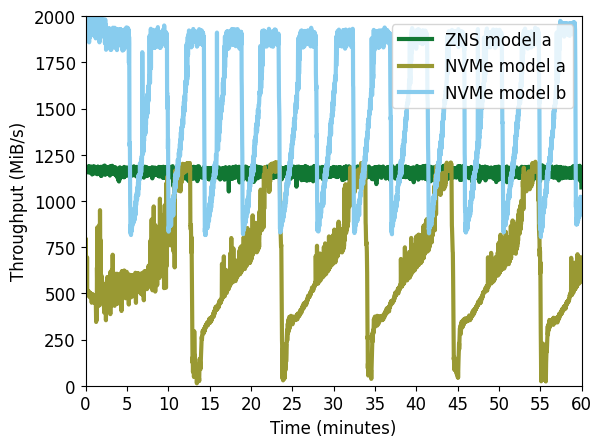

In [152]:
plt.ylabel("Throughput (MiB/s)")
plt.xlabel("Time (minutes)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 2000)
plt.xlim(0, 600*6)

x = range( int((60 * 20 * 1000) / 5000))
y = range( int((60 * 20 * 1000) / 5000))

x = range(len(bandwidth_write_zns))
y = bandwidth_write_zns

plt.errorbar(
    x,
    [yi / 1024  for yi in y],
    linewidth=3,
    label="ZNS model a",
    color=append_col,
    fmt='-',
)

x = range(len(bandwidth_write_2))
y = bandwidth_write_2

plt.errorbar(
    x,
    [yi / 1024 for yi in y],
    linewidth=3,
    label="NVMe model a",
    color=write_mq_deadline_col,
    fmt='-',
)

x = range(len(bandwidth_write_3))
y = bandwidth_write_3

plt.errorbar(
    x,
    [yi / 1024 for yi in y],
    linewidth=3,
    label="NVMe model b",
    color=write_none_col,
    fmt='-',
)


plt.xticks([x * 60 * 5 for x in range(13)],[x * 5 for x in range(13)])
plt.legend(loc='upper right')

In [389]:
bandwidth_read_nvme2

[764,
 896,
 676,
 632,
 644,
 736,
 668,
 640,
 720,
 660,
 548,
 732,
 668,
 740,
 544,
 736,
 640,
 672,
 608,
 648,
 660,
 740,
 572,
 708,
 536,
 648,
 608,
 672,
 668,
 584,
 668,
 732,
 644,
 896,
 772,
 796,
 888,
 648,
 612,
 668,
 636,
 868,
 648,
 888,
 896,
 648,
 684,
 672,
 680,
 644,
 644,
 892,
 544,
 696,
 680,
 768,
 540,
 736,
 648,
 792,
 868,
 512,
 640,
 796,
 872,
 828,
 832,
 796,
 1012,
 1128,
 856,
 1072,
 896,
 668,
 812,
 576,
 660,
 936,
 828,
 896,
 924,
 996,
 588,
 828,
 632,
 640,
 640,
 556,
 664,
 832,
 648,
 876,
 940,
 852,
 676,
 992,
 672,
 612,
 748,
 688,
 768,
 884,
 648,
 632,
 640,
 628,
 636,
 592,
 588,
 600,
 640,
 640,
 812,
 864,
 704,
 668,
 636,
 780,
 696,
 860,
 780,
 920,
 564,
 996,
 904,
 824,
 656,
 652,
 704,
 688,
 656,
 636,
 868,
 708,
 716,
 640,
 888,
 652,
 764,
 772,
 700,
 592,
 952,
 708,
 740,
 612,
 648,
 692,
 584,
 684,
 664,
 612,
 680,
 728,
 700,
 712,
 684,
 724,
 720,
 684,
 688,
 612,
 748,
 640,
 684,
 640,
 

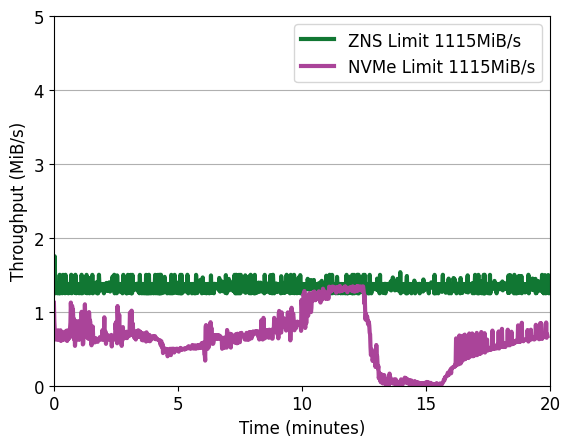

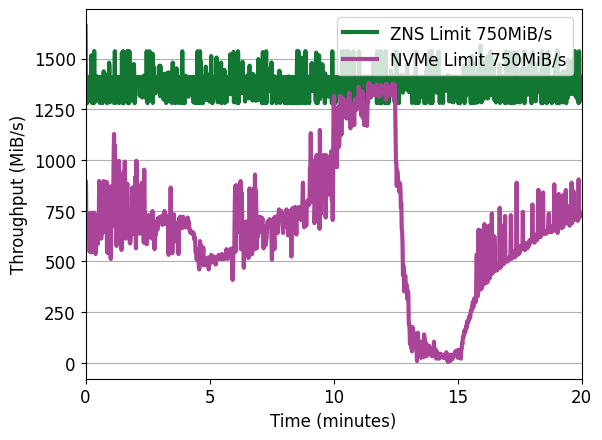

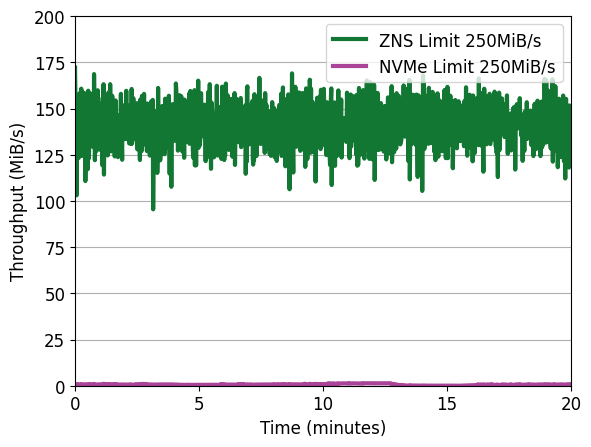

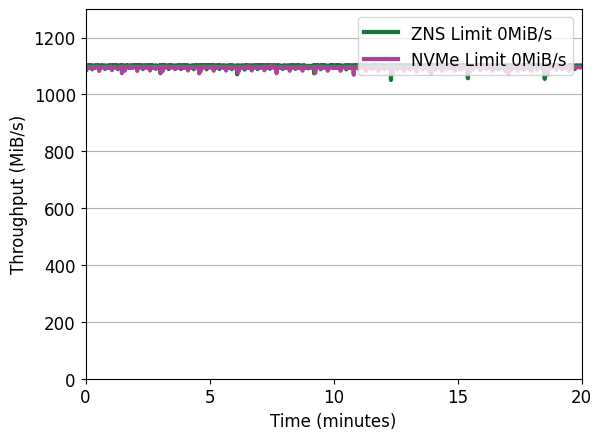

In [395]:
fig, ax = plt.subplots()

plt.ylabel("Throughput (MiB/s)")
plt.xlabel("Time (minutes)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 5)
plt.xlim(0, 600*2)

x = range(len(bandwidth_read))
y = bandwidth_read

plt.errorbar(
    x,
    [yi / 1024 for yi in y],
    linewidth=3,
    label="ZNS Limit 1115MiB/s",
    color=append_col,
    fmt='-',
)

x = range(len(bandwidth_read_nvme))
y = bandwidth_read_nvme

plt.errorbar(
    x,
    [yi / 1024 for yi in y],
    linewidth=3,
    label="NVMe Limit 1115MiB/s",
    color=read_mq_deadline_col,
    fmt='-',
)


plt.xticks([x * 60 * 5 for x in range(5)],[x * 5 for x in range(5)])
plt.legend(loc='upper right')

fig, ax = plt.subplots()

plt.ylabel("Throughput (MiB/s)")
plt.xlabel("Time (minutes)")
ax.yaxis.grid() # horizontal lines
#plt.ylim(0, 200)
plt.xlim(0, 600*2)

x = range(len(bandwidth_read2))
y = bandwidth_read2

plt.errorbar(
    x,
    [yi  for yi in y],
    linewidth=3,
    label="ZNS Limit 750MiB/s",
    color=append_col,
    fmt='-',
)

x = range(len(bandwidth_read_nvme2))
y = bandwidth_read_nvme2

plt.errorbar(
    x,
    [yi  for yi in y],
    linewidth=3,
    label="NVMe Limit 750MiB/s",
    color=read_mq_deadline_col,
    fmt='-',
)


plt.xticks([x * 60 * 5 for x in range(5)],[x * 5 for x in range(5)])
plt.legend(loc='upper right')

fig, ax = plt.subplots()

plt.ylabel("Throughput (MiB/s)")
plt.xlabel("Time (minutes)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 200)
plt.xlim(0, 600*2)

x = range(len(bandwidth_read3))
y = bandwidth_read3

plt.errorbar(
    x,
    [yi / 1024 for yi in y],
    linewidth=3,
    label="ZNS Limit 250MiB/s",
    color=append_col,
    fmt='-',
)

x = range(len(bandwidth_read_nvme3))
y = bandwidth_read_nvme3

plt.errorbar(
    x,
    [yi / 1024 for yi in y],
    linewidth=3,
    label="NVMe Limit 250MiB/s",
    color=read_mq_deadline_col,
    fmt='-',
)


plt.xticks([x * 60 * 5 for x in range(5)],[x * 5 for x in range(5)])
plt.legend(loc='upper right')


fig, ax = plt.subplots()

plt.ylabel("Throughput (MiB/s)")
plt.xlabel("Time (minutes)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 1300)
plt.xlim(0, 600*2)

x = range(len(bandwidth_read4))
y = bandwidth_read4

plt.errorbar(
    x,
    [yi / 1024 for yi in y],
    linewidth=3,
    label="ZNS Limit 0MiB/s",
    color=append_col,
    fmt='-',
)

x = range(len(bandwidth_read_nvme4))
y = bandwidth_read_nvme4

plt.errorbar(
    x,
    [yi / 1024 for yi in y],
    linewidth=3,
    label="NVMe Limit 0MiB/s",
    color=read_mq_deadline_col,
    fmt='-',
)

plt.xticks([x * 60 * 5 for x in range(5)],[x * 5 for x in range(5)])
plt.legend(loc='upper right')

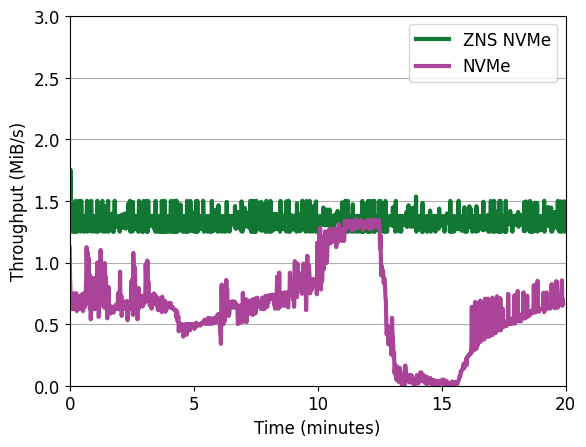

In [409]:
fig, ax = plt.subplots()

plt.ylabel("Throughput (MiB/s)")
plt.xlabel("Time (minutes)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 3)
plt.xlim(0, 600*2)

x = range(len(bandwidth_read))
y = bandwidth_read

plt.errorbar(
    x,
    [yi / 1024 for yi in y],
    linewidth=3,
    label="ZNS NVMe",
    color=append_col,
    fmt='-',
)

x = range(len(bandwidth_read_nvme))
y = bandwidth_read_nvme

plt.errorbar(
    x,
    [yi / 1024 for yi in y],
    linewidth=3,
    label="NVMe",
    color=read_mq_deadline_col,
    fmt='-',
)

plt.xticks([x * 60 * 5 for x in range(5)],[x * 5 for x in range(5)])
plt.legend(loc='upper right')

plt.savefig(f"{plot_dir}/f12-read_inteference_zns_versus_nvme.pdf")


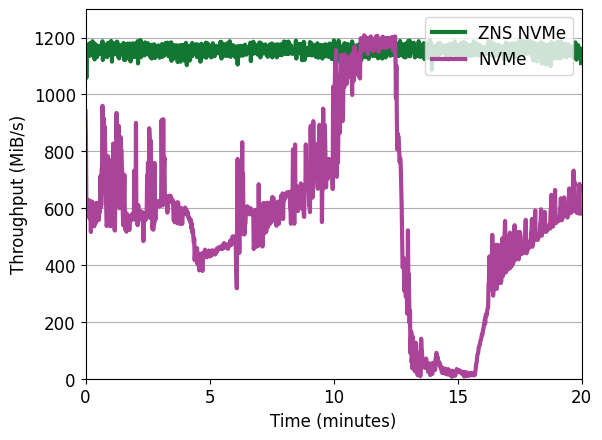

In [408]:
fig, ax = plt.subplots()

plt.ylabel("Throughput (MiB/s)")
plt.xlabel("Time (minutes)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 1300)
plt.xlim(0, 600*2)

x = range(len(bandwidth_write_zns))
y = bandwidth_write_zns

plt.errorbar(
    x,
    [yi / 1024 for yi in y],
    linewidth=3,
    label="ZNS NVMe",
    color=append_col,
    fmt='-',
)


x = range(len(bandwidth_write_2))
y = bandwidth_write_2

plt.errorbar(
    x,
    [yi / 1024 for yi in y],
    linewidth=3,
    label="NVMe",
    color=read_mq_deadline_col,
    fmt='-',
)


plt.xticks([x * 60 * 5 for x in range(5)],[x * 5 for x in range(5)])
plt.legend(loc='upper right')

plt.savefig(f"{plot_dir}/f12-gc_zns_versus_nvme.pdf")

In [ ]:
plt.ylabel("Throughput (KIOPS)")
plt.xlabel("Time (minutes)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 1500)
plt.xlim(0, 600)

x = range( int((60 * 20 * 1000) / 5000))
y = range( int((60 * 20 * 1000) / 5000))

x = range(len(bandwidth_read))
y = bandwidth_read

plt.errorbar(
    x,
    y,
    linewidth=3,
    label="Limit 500MiB",
    color=read_col,
    fmt='-',
)

x = range(len(bandwidth_read_zns))
y = bandwidth_read_zns

plt.errorbar(
    x,
    y,
    linewidth=3,
    label="Limit 500MiB",
    color=read_none_col,
    fmt='-',
)

x = range(len(bandwidth_write))
y = bandwidth_write

plt.errorbar(
    x,
    y,
    linewidth=3,
    label="Limit 500MiB",
    color=write_col,
    fmt='-',
)

plt.xticks([x * 60 for x in range(10)],[x for x in range(10)])

# Reset inteference effects

Percentile reads:
- normal 81816.0
- with two 81812.0
- interrupts 28000321.15
Percentile write:
- normal 12419.0
- with two 12508.0
- interrupts 32000852.8
Percentile append:
- normal 15661.0
- with two 15620.0
- interrupts 31476163.95
17935489.6


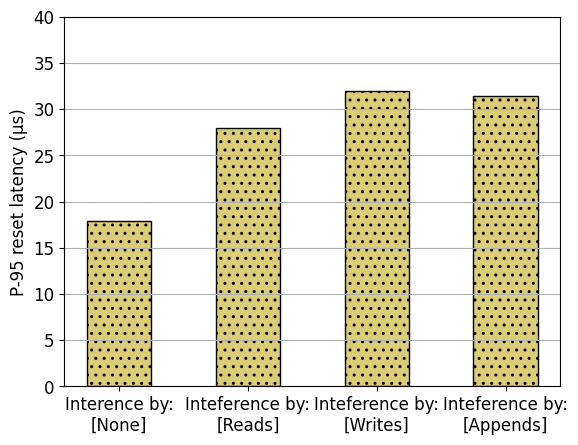

In [225]:
normal_reads = []
read_int_open = []
read_int_reads = []
read_int_resets = []

with open("../data/custom/zns-a/pure_read/read", "r") as f:
    lines =  f.readlines()
    normal_reads = [int(line.split(',')[1]) for line in lines if 'read' in line]
    normal_reads = [read for read in normal_reads if read > 0]
with open("../data/custom/zns-a/inteference/read_reset_inteference_resets", "r") as f:
    lines =  f.readlines()
    read_int_resets = [int(line.split(',')[1]) for line in lines if 'reset' in line]
with open("../data/custom/zns-a/inteference/read_reset_inteference_reads", "r") as f:
    lines =  f.readlines()
    read_int_reads = [int(line.split(',')[1]) for line in lines if 'read' in line]
    read_int_reads = [read for read in read_int_reads if read > 0]
with open("../data/custom/zns-a/inteference/read_reset_inteference_fill_open", "r") as f:
    lines =  f.readlines()
    read_int_open = [int(line.split(',')[1]) for line in lines if 'open' in line]    
    read_int_open = [read for read in read_int_open if read > 0]

# print(len(read_int_open), sum(read_int_open) / len(read_int_open))    
# print(len(read_int_reads), sum(read_int_reads) / len(read_int_reads))    
# print(len(read_int_resets), sum(read_int_resets) / len(read_int_resets))   

print("Percentile reads:")
print(f"- normal {np.percentile(normal_reads,95)}")
print(f"- with two {np.percentile(read_int_reads,95)}")
print(f"- interrupts {np.percentile(read_int_resets,95)}")


write_int_open = []
write_int_fill_writes = []
write_int_writes = []
write_int_resets = []

with open("../data/custom/zns-a/inteference/write_reset_inteference_resets", "r") as f:
    lines =  f.readlines()
    write_int_resets = [int(line.split(',')[1]) for line in lines if 'reset' in line]
    write_int_resets = [read for read in write_int_resets if read > 0]
with open("../data/custom/zns-a/inteference/write_reset_inteference_writes", "r") as f:
    lines =  f.readlines()
    write_int_writes = [int(line.split(',')[1]) for line in lines if 'write' in line]
    write_int_writes = [read for read in write_int_writes if read > 0]
with open("../data/custom/zns-a/inteference/write_reset_inteference_fill_writes", "r") as f:
    lines =  f.readlines()
    write_int_fill_writes = [int(line.split(',')[1]) for line in lines if 'write' in line]
    write_int_fill_writes = [read  for read in write_int_fill_writes if read > 0]
with open("../data/custom/zns-a/inteference/write_reset_inteference_fill_opens", "r") as f:
    lines =  f.readlines()
    write_int_open = [int(line.split(',')[1]) for line in lines if 'open' in line]    

# print("write")
# print(len(write_int_open), sum(write_int_open) / len(write_int_open))    
# print(len(write_int_fill_writes), sum(write_int_fill_writes) / len(write_int_fill_writes)) 
# print(len(write_int_writes), sum(write_int_writes) / len(write_int_writes))    
# print(len(write_int_resets), sum(write_int_resets) / len(write_int_resets)) 

print("Percentile write:")
print(f"- normal {np.percentile(write_int_fill_writes,95)}")
print(f"- with two {np.percentile(write_int_writes,95)}")
print(f"- interrupts {np.percentile(write_int_resets,95)}")

append_int_open = []
append_int_fill_appends = []
append_int_appends = []
append_int_resets = []

with open("../data/custom/zns-a/inteference/append_reset_inteference_resets", "r") as f:
    lines =  f.readlines()
    append_int_resets = [int(line.split(',')[1]) for line in lines if 'reset' in line]
    append_int_resets = [read for read in append_int_resets if read > 0]
with open("../data/custom/zns-a/inteference/append_reset_inteference_appends", "r") as f:
    lines =  f.readlines()
    append_int_appends = [int(line.split(',')[1]) for line in lines if 'append' in line]
    append_int_appends = [read for read in append_int_appends if read > 0]
with open("../data/custom/zns-a/inteference/append_reset_inteference_fill_appends", "r") as f:
    lines =  f.readlines()
    append_int_fill_appends = [int(line.split(',')[1]) for line in lines if 'append' in line]
    append_int_fill_appends = [read for read in append_int_fill_appends if read > 0]  

# print("append")
# print(len(append_int_fill_appends), sum(append_int_fill_appends) / len(append_int_fill_appends)) 
# print(len(append_int_appends), sum(append_int_appends) / len(append_int_appends))    
# print(len(append_int_resets), sum(append_int_resets) / len(append_int_resets)) 

print("Percentile append:")
print(f"- normal {np.percentile(append_int_fill_appends,95)}")
print(f"- with two {np.percentile(append_int_appends,95)}")
print(f"- interrupts {np.percentile(append_int_resets,95)}")

fig, ax = plt.subplots()
plt.ylabel("P-95 reset latency (μs)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 40)

labs = ["Interence by:\n[None]", "Inteference by:\n[Reads]", "Inteference by:\n[Writes]", "Inteference by:\n[Appends]"]
vals = [np.percentile([r / 1000_000 for r in reset_100],95),
        np.percentile([r / 1000_000 for r in read_int_resets] ,95),
        np.percentile([r / 1000_000 for r in write_int_resets] ,95),
        np.percentile([r / 1000_000 for r in append_int_resets],95)]

ax.bar(range(len(labs)), vals, align='center', color=reset_col, 
       hatch=lbaf2_pattern, edgecolor = "black", ecolor="black", width = 0.5)
ax.set_xticks(range(len(labs)), labels=labs)
    
plt.savefig(f"{plot_dir}/f13-reset_inteference.pdf")

print(np.percentile([r for r in reset_100], 95))